In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import geopandas as gpd

# Ładowanie danych - GUS

In [2]:
df = pd.read_csv('data_crimes.csv',sep=";", quotechar='"')

print(df)

                  Nazwa  1 kwartał;przestępstwa stwierdzone;ogółem;2016;[-]  \
0                POLSKA                                             181162    
1          DOLNOŚLĄSKIE                                              17437    
2    KUJAWSKO-POMORSKIE                                               8804    
3             LUBELSKIE                                               6655    
4              LUBUSKIE                                               6037    
5               ŁÓDZKIE                                              10733    
6           MAŁOPOLSKIE                                              18748    
7           MAZOWIECKIE                                              24765    
8              OPOLSKIE                                               4157    
9          PODKARPACKIE                                               4826    
10            PODLASKIE                                               4114    
11            POMORSKIE                             

# Preprocessing

### Zmienianie kolumn na wiersze

In [3]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: Nazwa
1: 1 kwartał;przestępstwa stwierdzone;ogółem;2016;[-]
2: 1 kwartał;przestępstwa stwierdzone;ogółem;2017;[-]
3: 1 kwartał;przestępstwa stwierdzone;ogółem;2018;[-]
4: 1 kwartał;przestępstwa stwierdzone;ogółem;2019;[-]
5: 1 kwartał;przestępstwa stwierdzone;ogółem;2020;[-]
6: 1 kwartał;przestępstwa stwierdzone;ogółem;2021;[-]
7: 1 kwartał;przestępstwa stwierdzone;ogółem;2022;[-]
8: 1 kwartał;przestępstwa stwierdzone;ogółem;2023;[-]
9: 1 kwartał;przestępstwa stwierdzone;ogółem;2024;[-]
10: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2016;[-]
11: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2017;[-]
12: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2018;[-]
13: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2019;[-]
14: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2020;[-]
15: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2021;[-]
16: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminal

In [4]:
df_long = df.melt(id_vars=['Nazwa'],    #zostawiamy
                  var_name='Okres',     #Nowa Kolumna
                  value_name='Liczba')  #Kolumna dla wartości

df_long

,Nazwa,Okres,Liczba
0,POLSKA,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,181162.0
1,DOLNOŚLĄSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,17437.0
2,KUJAWSKO-POMORSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,8804.0
3,LUBELSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,6655.0
4,LUBUSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,6037.0
...,...,...,...
10399,ŚLĄSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,4876.0
10400,ŚWIĘTOKRZYSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,1271.0
10401,WARMIŃSKO-MAZURSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,4404.0
10402,WIELKOPOLSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,7953.0


In [5]:
print(df_long['Liczba'].apply(type).value_counts())

Liczba
<class 'float'>    10404
Name: count, dtype: int64


In [6]:
column_parts = df_long['Okres'].str.split(';', expand=True)
column_parts

,0,1,2,3,4
0,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
1,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
2,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
3,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
4,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
...,...,...,...,...,...
10399,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10400,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10401,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10402,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]


In [7]:
df_long['Kwartał'] = column_parts[0] 
df_long['Przestępstwo'] = column_parts[2]
df_long['Rok'] = column_parts[3]
df_long['Województwo'] = df_long['Nazwa']

# Final DataFrame
df_final = df_long[['Województwo', 'Przestępstwo', 'Kwartał', 'Rok', 'Liczba']]

# Sorting
df_final = df_final.sort_values(['Rok', 'Kwartał'])


df_final.head(15)

,Województwo,Przestępstwo,Kwartał,Rok,Liczba
0,POLSKA,ogółem,1 kwartał,2016,181162.0
1,DOLNOŚLĄSKIE,ogółem,1 kwartał,2016,17437.0
2,KUJAWSKO-POMORSKIE,ogółem,1 kwartał,2016,8804.0
3,LUBELSKIE,ogółem,1 kwartał,2016,6655.0
4,LUBUSKIE,ogółem,1 kwartał,2016,6037.0
5,ŁÓDZKIE,ogółem,1 kwartał,2016,10733.0
6,MAŁOPOLSKIE,ogółem,1 kwartał,2016,18748.0
7,MAZOWIECKIE,ogółem,1 kwartał,2016,24765.0
8,OPOLSKIE,ogółem,1 kwartał,2016,4157.0
9,PODKARPACKIE,ogółem,1 kwartał,2016,4826.0


In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10404 entries, 0 to 10403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   10404 non-null  object 
 1   Przestępstwo  10404 non-null  object 
 2   Kwartał       10404 non-null  object 
 3   Rok           10404 non-null  object 
 4   Liczba        7684 non-null   float64
dtypes: float64(1), object(4)
memory usage: 487.7+ KB


In [9]:
df_final["Rok"] = df_final["Rok"].astype(int)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10404 entries, 0 to 10403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   10404 non-null  object 
 1   Przestępstwo  10404 non-null  object 
 2   Kwartał       10404 non-null  object 
 3   Rok           10404 non-null  int64  
 4   Liczba        7684 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 487.7+ KB


### Usuwanie przestępstw łączonych ("razem")

In [10]:
df_final['Przestępstwo'].unique()

array(['ogółem', 'o charakterze kryminalnym',
       'o charakterze gospodarczym',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji razem',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji - drogowe',
       'przeciwko życiu i zdrowiu', 'przeciwko mieniu',
       'przeciwko wolności, wolności sumienia, wolności seksualnej i obyczajności razem',
       'przeciwko wolności i wolności sumienia razem',
       'przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

In [11]:
df_final = df_final[ ~df_final['Przestępstwo'].str.contains("razem", case=False, na=False)]
df_final['Przestępstwo'].unique()

array(['ogółem', 'o charakterze kryminalnym',
       'o charakterze gospodarczym',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji - drogowe',
       'przeciwko życiu i zdrowiu', 'przeciwko mieniu',
       'przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

### Obliczanie kwartałów i daty

In [12]:
df_final["Kwartał"].unique()

array(['1 kwartał', '1-3 kwartały', 'pierwsze półrocze', 'rok'],
      dtype=object)

In [13]:
#Wyodrębienie okresów czasu, aby obliczyć wszystkie kwartały

Q1 = df_final[df_final["Kwartał"] == "1 kwartał"]
Q12 = df_final[df_final["Kwartał"] == "pierwsze półrocze"]
Q13 =  df_final[df_final["Kwartał"] == "1-3 kwartały"]
Y =  df_final[df_final["Kwartał"] == "rok"]

#Kwartał 2
Q2 = pd.merge(
    Q1, Q12,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q1", "_Q12")
)

Q2["Liczba"] = Q2["Liczba_Q12"] - Q2["Liczba_Q1"]
Q2["Kwartał"] = "2 kwartał"
Q2= Q2.drop(["Kwartał_Q1", "Liczba_Q1", "Kwartał_Q12", "Liczba_Q12"], axis=1)




#Kwartał 3
Q3 = pd.merge(
    Q12, Q13,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q12", "_Q13")
)

Q3["Liczba"] = Q3["Liczba_Q13"] - Q3["Liczba_Q12"]
Q3["Kwartał"] = "3 kwartał"
Q3= Q3.drop(["Kwartał_Q12", "Liczba_Q12", "Kwartał_Q13", "Liczba_Q13"], axis=1)


#Kwartał 4
Q4 = pd.merge(
    Q13, Y,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q13", "_Y")
)

Q4["Liczba"] = Q4["Liczba_Y"] - Q4["Liczba_Q13"]
Q4["Kwartał"] = "4 kwartał"
Q4= Q4.drop(["Kwartał_Q13", "Liczba_Q13", "Kwartał_Y", "Liczba_Y"], axis=1)

df_final = pd.concat([df_final, Q2, Q3, Q4], ignore_index=True)
df_final

,Województwo,Przestępstwo,Kwartał,Rok,Liczba
0,POLSKA,ogółem,1 kwartał,2016,181162.0
1,DOLNOŚLĄSKIE,ogółem,1 kwartał,2016,17437.0
2,KUJAWSKO-POMORSKIE,ogółem,1 kwartał,2016,8804.0
3,LUBELSKIE,ogółem,1 kwartał,2016,6655.0
4,LUBUSKIE,ogółem,1 kwartał,2016,6037.0
...,...,...,...,...,...
14989,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,1168.0
14990,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,356.0
14991,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,429.0
14992,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,1454.0


In [14]:
df_final["Kwartał"].unique()

array(['1 kwartał', '1-3 kwartały', 'pierwsze półrocze', 'rok',
       '2 kwartał', '3 kwartał', '4 kwartał'], dtype=object)

In [15]:
df_final = df_final[ ~df_final['Kwartał'].str.contains("pierwsze półrocze|1-3 kwartały", case=False, na=False)]
df_final['Kwartał'].unique()

array(['1 kwartał', 'rok', '2 kwartał', '3 kwartał', '4 kwartał'],
      dtype=object)

In [16]:
mapa_kwartał = {
    "1 kwartał": 1,
    "2 kwartał": 2,
    "3 kwartał": 3,
    "4 kwartał": 4,
    "rok": 0
}

df_final["Kwartał"] = df_final["Kwartał"].map(mapa_kwartał)

C:\Users\Wiola\AppData\Local\Temp\ipykernel_13936\1067151899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Kwartał"] = df_final["Kwartał"].map(mapa_kwartał)


In [17]:
#tworzymy nową kolumnę zawierającą dany rok i kwartał
df_final = df_final.sort_values(['Rok', 'Kwartał'])
df_final['Data'] = df_final['Rok'].astype(str) + '-Q' + df_final['Kwartał'].astype(str)


In [18]:
df_final.reset_index(drop=True)

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Data
0,POLSKA,ogółem,0,2016,748459.0,2016-Q0
1,DOLNOŚLĄSKIE,ogółem,0,2016,74705.0,2016-Q0
2,KUJAWSKO-POMORSKIE,ogółem,0,2016,37144.0,2016-Q0
3,LUBELSKIE,ogółem,0,2016,31221.0,2016-Q0
4,LUBUSKIE,ogółem,0,2016,22775.0,2016-Q0
...,...,...,...,...,...,...
10705,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1168.0,2024-Q4
10706,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,356.0,2024-Q4
10707,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,429.0,2024-Q4
10708,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1454.0,2024-Q4


### Label Encoding

In [19]:
le = LabelEncoder()
df_final['Przestępstwo_ID'] = le.fit_transform(df_final['Przestępstwo'])
df_final['Województwo_ID'] = le.fit_transform(df_final['Województwo'])

In [20]:
id_map = df_final[['Przestępstwo_ID', 'Przestępstwo']].drop_duplicates().sort_values('Przestępstwo_ID')
id_map

,Przestępstwo_ID,Przestępstwo
748,0,o charakterze gospodarczym
731,1,o charakterze kryminalnym
714,2,ogółem
765,3,przeciwko bezpieczeństwu powszechnemu i bezpie...
850,4,przeciwko działalności instytucji państwowych ...
799,5,przeciwko mieniu
901,6,przeciwko obrotowi gospodarczemu
918,7,przeciwko obrotowi pieniędzmi i papierami wart...
833,8,przeciwko rodzinie i opiece
884,9,przeciwko wiarygodności dokumentów


In [21]:
id_map = df_final[['Województwo_ID', 'Województwo']].drop_duplicates().sort_values('Województwo_ID')
id_map

,Województwo_ID,Województwo
715,0,DOLNOŚLĄSKIE
716,1,KUJAWSKO-POMORSKIE
717,2,LUBELSKIE
718,3,LUBUSKIE
721,4,MAZOWIECKIE
720,5,MAŁOPOLSKIE
722,6,OPOLSKIE
723,7,PODKARPACKIE
724,8,PODLASKIE
714,9,POLSKA


### Missing values

In [22]:
df_null = df_final[df_final.isnull().any(axis=1)]
df_null

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Data,Przestępstwo_ID,Województwo_ID
816,POLSKA,przeciwko wolności,0,2016,NaN,2016-Q0,10,9
817,DOLNOŚLĄSKIE,przeciwko wolności,0,2016,NaN,2016-Q0,10,0
818,KUJAWSKO-POMORSKIE,przeciwko wolności,0,2016,NaN,2016-Q0,10,1
819,LUBELSKIE,przeciwko wolności,0,2016,NaN,2016-Q0,10,2
820,LUBUSKIE,przeciwko wolności,0,2016,NaN,2016-Q0,10,3
...,...,...,...,...,...,...,...,...
13799,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,2019-Q4,13,15
13800,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,2019-Q4,13,16
13801,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,2019-Q4,13,11
13802,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,2019-Q4,13,12


In [23]:
df_null['Przestępstwo'].unique()

array(['przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

In [24]:
df_null['Rok'].unique()

array([2016, 2017, 2018, 2019])

#### Data since 2020 - do porównywania wszytskich kategorii

In [25]:
df_since_2020 = df_final.copy()
df_since_2020 = df_since_2020[(df_since_2020['Rok'] != 2016) & (df_since_2020['Rok'] != 2017) & (df_since_2020['Rok'] != 2018) & (df_since_2020['Rok'] != 2019)]
df_since_2020

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Data,Przestępstwo_ID,Województwo_ID
4522,POLSKA,ogółem,0,2020,765408.0,2020-Q0,2,9
4523,DOLNOŚLĄSKIE,ogółem,0,2020,74802.0,2020-Q0,2,0
4524,KUJAWSKO-POMORSKIE,ogółem,0,2020,37172.0,2020-Q0,2,1
4525,LUBELSKIE,ogółem,0,2020,29057.0,2020-Q0,2,2
4526,LUBUSKIE,ogółem,0,2020,24531.0,2020-Q0,2,3
...,...,...,...,...,...,...,...,...
14989,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1168.0,2024-Q4,13,15
14990,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,356.0,2024-Q4,13,16
14991,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,429.0,2024-Q4,13,11
14992,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1454.0,2024-Q4,13,12


In [26]:
df_since_2020.isnull().sum()

Województwo        0
Przestępstwo       0
Kwartał            0
Rok                0
Liczba             0
Data               0
Przestępstwo_ID    0
Województwo_ID     0
dtype: int64

In [27]:
df_since_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5950 entries, 4522 to 14993
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Województwo      5950 non-null   object 
 1   Przestępstwo     5950 non-null   object 
 2   Kwartał          5950 non-null   int64  
 3   Rok              5950 non-null   int64  
 4   Liczba           5950 non-null   float64
 5   Data             5950 non-null   object 
 6   Przestępstwo_ID  5950 non-null   int64  
 7   Województwo_ID   5950 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 418.4+ KB


# Analiza przestępczości w Polsce

## Wykres dla przestępczości w Polsce - kwartalnie

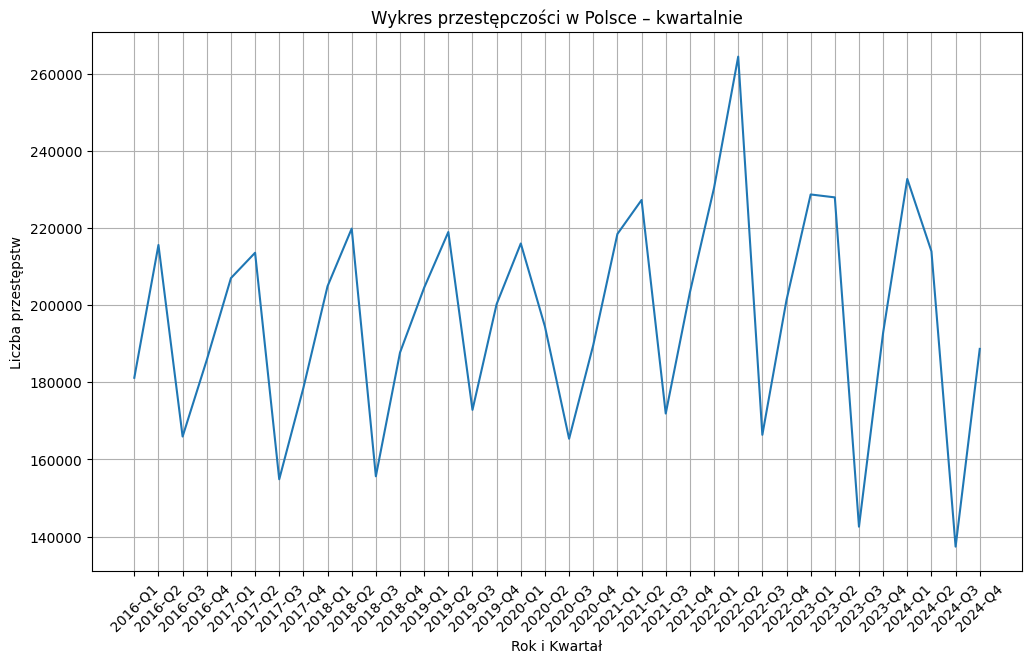

In [477]:
df_poland = df_final[(df_final['Województwo'] == 'POLSKA') & (df_final['Przestępstwo'] == 'ogółem')  & (df_final['Kwartał'] != 0)]

plt.figure(figsize=(12,7))
plt.plot(df_poland['Data'], df_poland['Liczba'])
plt.title('Wykres przestępczości w Polsce – kwartalnie')
plt.xlabel('Rok i Kwartał')
plt.ylabel('Liczba przestępstw')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Skok w 2022 - polska

* W 2022 roku było 13 358 podań o przyjęcie do służby, a w 2023 roku - 15 289.


WAKATY I KADRY

* Wzrost wakatów wynikał z dwóch zjawisk:
1. Rozbudowa etatów:  limit etatów policyjnych znacznie podnoszono. 
- W 2022 roku o 2000, 
- w 2023 roku o 1800, 
- w 2024 roku o kolejne 1800, 
- aż do obecnych 110 709.

2. Wysoka fala odejść ze służby doświadczonych policjantów (kulminująca w 2023 roku):
-Główne powody odejść: wypalenie, niskie płace w stosunku do obciążeń, możliwość skorzystania z uprawnień emerytalnych, spadek prestiżu zawodu, kontrowersje wizerunkowe.

W efekcie lata 2022–2023 przyniosły niespotykaną dotąd liczbę zwolnień ze służby. Z danych związków zawodowych wynika, że w samym 2023 roku z Policji odeszło ok. 9,4–9,5 tys. funkcjonariuszy, podczas gdy przyjęto tylko ok. 5,2 tys., co dało ujemny bilans kadrowy rzędu –4,2 tys. osób


* Do tego dochodzą takze czynniki jakościowe utrudniające nabór min. trudności rekrutacyjne (wysokie wymagania) oraz konkurencyjny rynek pracy.

---

sytuacja w polsce: 
* Po lockdownach i ograniczeniach związanych z COVID-19 w latach 2020–2021 ludzie wrócili do normalnej aktywności, co naturalnie zwiększyło okazje do popełniania przestępstw

* średnioroczny wskaźnik cen towarów i usług konsumpcyjnych – w roku 2021 wyniósł 14,4%
dane na koniec grudnia 2021 wskaźnika: „Analogiczny miesiąc poprzedniego roku = 100„pokazują wartość wzrostu cen w ciągu całego 2022 roku na poziomie 16,6%


* migracje: w 2022 roku - 494279,    w 2021- 361447

wskaźniki:


Źródła:
- https://niebiescy997.pl/wakaty-w-policji/#google_vignette
- https://www.policja.pl/pol/aktualnosci/254941,Sytuacja-kadrowa-w-Policji.html

## Analiza kwartalna

### Wykres dla sumy przestępstw wedgłu kwartałów 

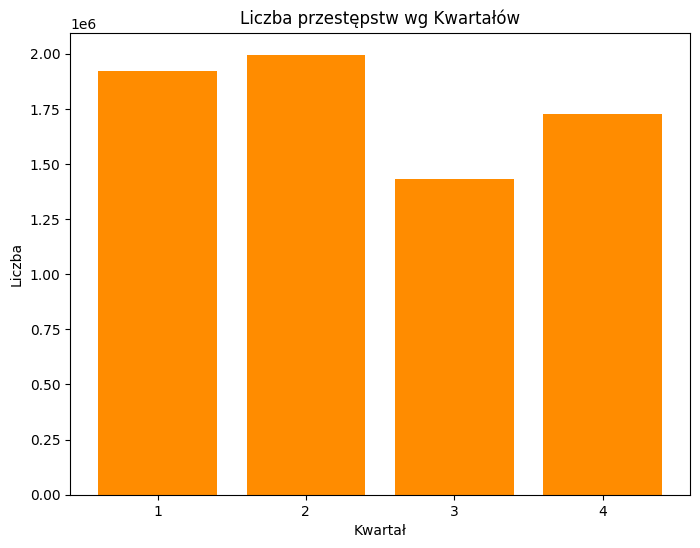

In [29]:
#grupujemy dane Polski według kwartałów i sumujemy
poland_sum = df_poland.groupby('Kwartał')['Liczba'].sum()


plt.figure(figsize=(8,6))
plt.bar(poland_sum.index, poland_sum.values, color='darkorange')
plt.title('Liczba przestępstw wg Kwartałów')
plt.ylabel('Liczba')
plt.xlabel('Kwartał')
plt.xticks([1, 2, 3, 4], labels=['1', '2', '3', '4'])
plt.show()

### Wykres dla kwartalnych trendów w czasie

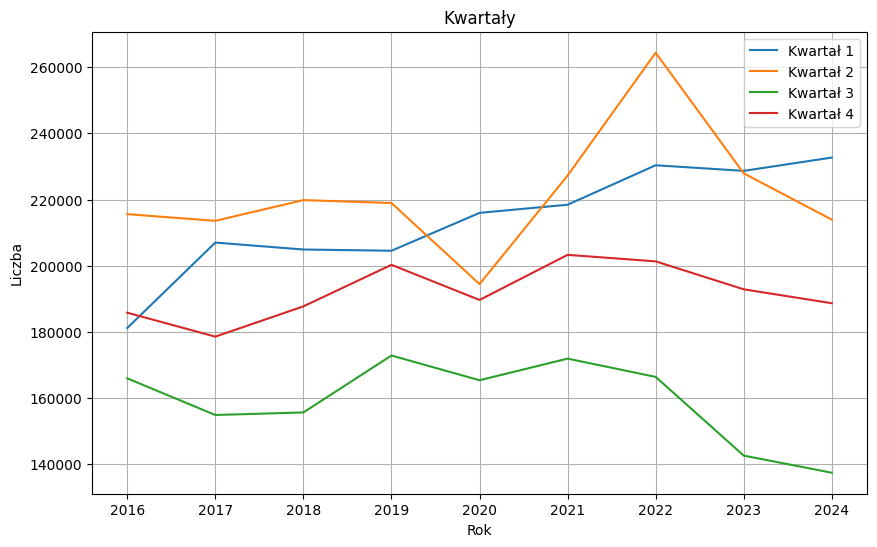

In [30]:
plt.figure(figsize=(10, 6)) 
for i in df_poland['Kwartał'].unique():
    df = df_poland[df_poland["Kwartał"] == i]
    df.set_index('Rok', inplace=True)
    plt.plot(df.index, df['Liczba'], label='Kwartał ' + i.astype(str))


plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Kwartały')
plt.legend()
plt.grid(True)
plt.show()

## Najczęstsze i najrzadsze przestepstwa w Polsce od 2020 roku

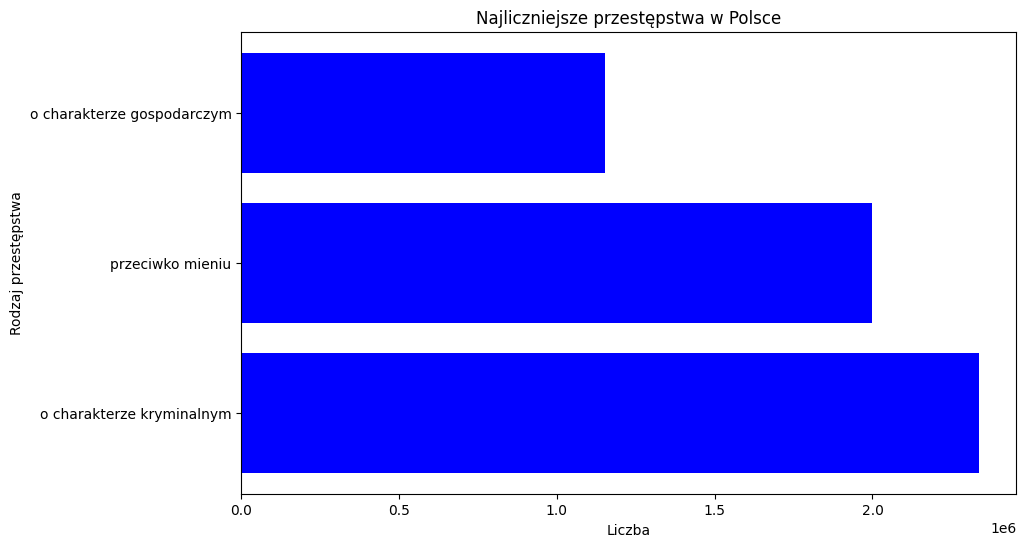

In [31]:
df_top_crimes = df_since_2020[(df_since_2020['Województwo'] == 'POLSKA') & (df_since_2020['Przestępstwo'] != 'ogółem')  & (df_since_2020['Kwartał'] == 0)]

crime_sum = df_top_crimes.groupby('Przestępstwo')['Liczba'].sum()
top3 = crime_sum.nlargest(3)


plt.figure(figsize=(10,6))
plt.barh(top3.index, top3.values, color='blue')
plt.title('Najliczniejsze przestępstwa w Polsce')
plt.xlabel('Liczba')
plt.ylabel('Rodzaj przestępstwa')
plt.show()

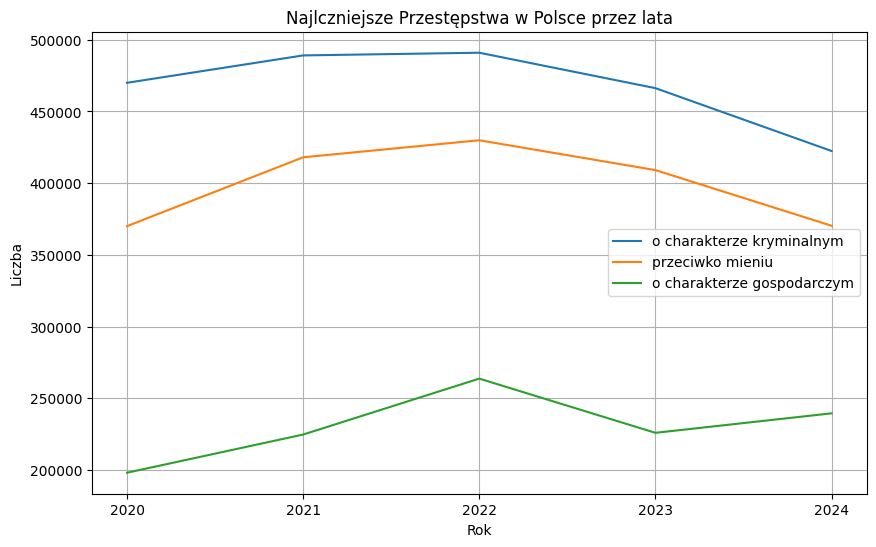

In [32]:
plt.figure(figsize=(10, 6))
for i in range(3):
    df = df_top_crimes[df_top_crimes['Przestępstwo'] == top3.index[i]]
    df.set_index('Rok', inplace=True)
    plt.plot(df.index, df['Liczba'], label=(top3.index[i]))

plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Najlczniejsze Przestępstwa w Polsce przez lata')
plt.xticks(df.index)
plt.legend()
plt.grid(True)
plt.show()

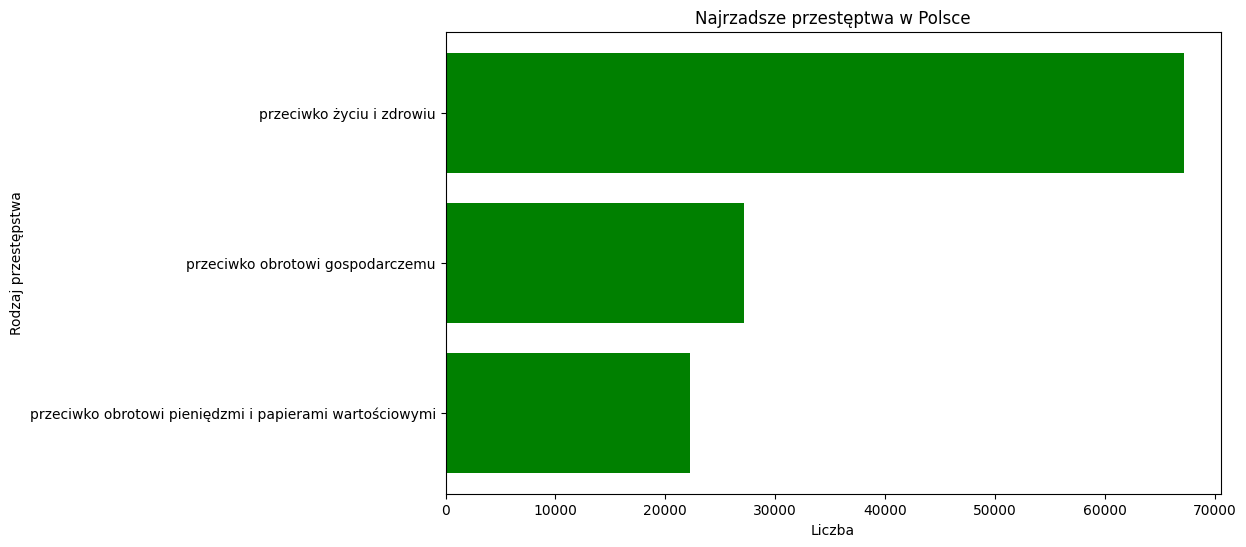

In [33]:
down3 = crime_sum.nsmallest(3)


plt.figure(figsize=(10,6))
plt.barh(down3.index, down3.values, color='green')
plt.title('Najrzadsze przestęptwa w Polsce')
plt.xlabel('Liczba')
plt.ylabel('Rodzaj przestępstwa')
plt.show()

# Analiza przestępczości z podziałem na Województwa

## Mapa Polski dla przestepstw przez wszystkie lata

In [34]:
df_woj = df_final[(df_final["Województwo_ID"] != 9) & (df_final["Przestępstwo_ID"] == 2)& (df_final["Kwartał"] == 0)]
woj_sum = df_woj.groupby('Województwo')['Liczba'].sum().sort_values(ascending=False)

In [35]:
regions = gpd.read_file("wojewodztwa-medium.geojson")
print(regions.head())

   id               nazwa                                           geometry
0   1             śląskie  MULTIPOLYGON (((19.4698 50.9154, 19.4689 50.91...
1   2            opolskie  POLYGON ((17.8122 51.1349, 17.812 51.1335, 17....
2   3       wielkopolskie  POLYGON ((16.8487 53.6287, 16.8496 53.6287, 16...
3   4  zachodniopomorskie  POLYGON ((16.3716 54.4414, 16.372 54.442, 16.3...
4   5      świętokrzyskie  POLYGON ((19.7471 50.866, 19.7474 50.8666, 19....


In [36]:
regions['nazwa']=regions['nazwa'].str.upper()
regions_merged = regions.merge(woj_sum, left_on='nazwa', right_on='Województwo', how='left')
regions_merged

,id,nazwa,geometry,Liczba
0,1,ŚLĄSKIE,"MULTIPOLYGON (((19.4698 50.9154, 19.4689 50.91...",1045054.0
1,2,OPOLSKIE,"POLYGON ((17.8122 51.1349, 17.812 51.1335, 17....",155679.0
2,3,WIELKOPOLSKIE,"POLYGON ((16.8487 53.6287, 16.8496 53.6287, 16...",563492.0
3,4,ZACHODNIOPOMORSKIE,"POLYGON ((16.3716 54.4414, 16.372 54.442, 16.3...",341173.0
4,5,ŚWIĘTOKRZYSKIE,"POLYGON ((19.7471 50.866, 19.7474 50.8666, 19....",188450.0
5,6,KUJAWSKO-POMORSKIE,"POLYGON ((18.6768 53.6907, 18.6785 53.6908, 18...",360993.0
6,7,PODLASKIE,"POLYGON ((21.926 53.0781, 21.9261 53.0783, 21....",160921.0
7,8,DOLNOŚLĄSKIE,"POLYGON ((16.4162 51.7849, 16.419 51.785, 16.4...",696023.0
8,9,PODKARPACKIE,"POLYGON ((22.5437 50.3563, 22.5459 50.3572, 22...",239961.0
9,10,MAŁOPOLSKIE,"POLYGON ((20.5632 50.1997, 20.5625 50.1991, 20...",679003.0


na 100 tys ludzi

In [128]:
woj_lud = df_woj.drop(columns=['Przestępstwo', 'Kwartał', 'Data', 'Przestępstwo_ID', 'Województwo_ID'])
ludnosc = pd.read_csv('ludnosc.csv')
ludnosc_100 = ludnosc.drop(columns = ['Kwartał', "Ludność"])


woj_merged = woj_lud.merge(ludnosc_100, on=['Województwo', 'Rok'], how='left' )
woj_merged['Liczba_na_100'] = woj_merged['Liczba']/woj_merged["Ludność_100tys"]

woj_sum_100 = woj_merged.groupby('Województwo')['Liczba_na_100'].sum().sort_values(ascending=False)

regions_merged_100 = regions.merge(woj_sum_100, left_on='nazwa', right_on='Województwo', how='left')

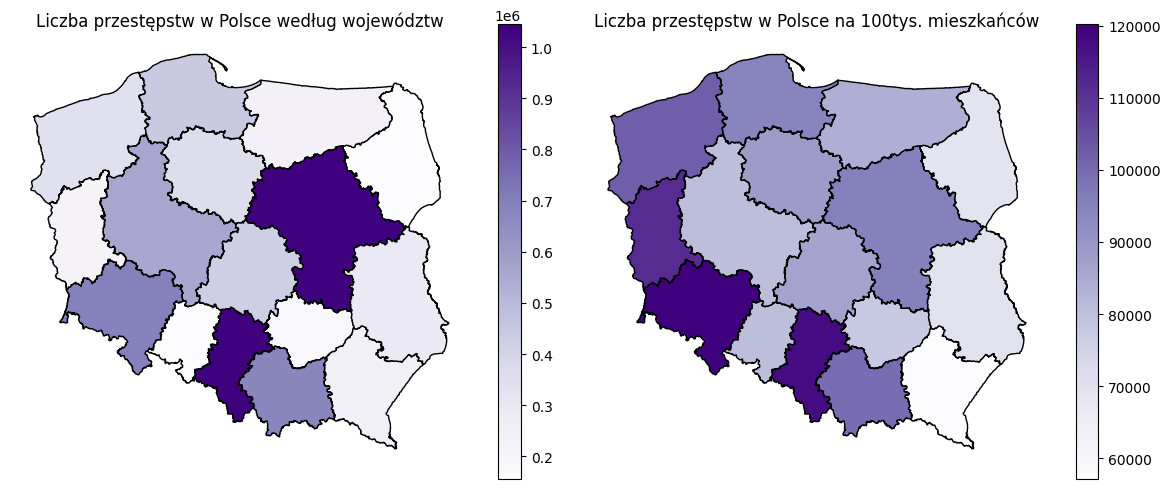

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

regions_merged.plot(column='Liczba',cmap='Purples',legend=True,edgecolor='black',ax=axes[0])
axes[0].set_title('Liczba przestępstw w Polsce według województw')
axes[0].axis('off')


regions_merged_100.plot(column='Liczba_na_100', cmap='Purples',legend=True, edgecolor='black',ax=axes[1])
axes[1].set_title('Liczba przestępstw w Polsce na 100tys. mieszkańców')
axes[1].axis('off')
plt.tight_layout()
plt.show()

## Województwa z największą ilością przestępstw

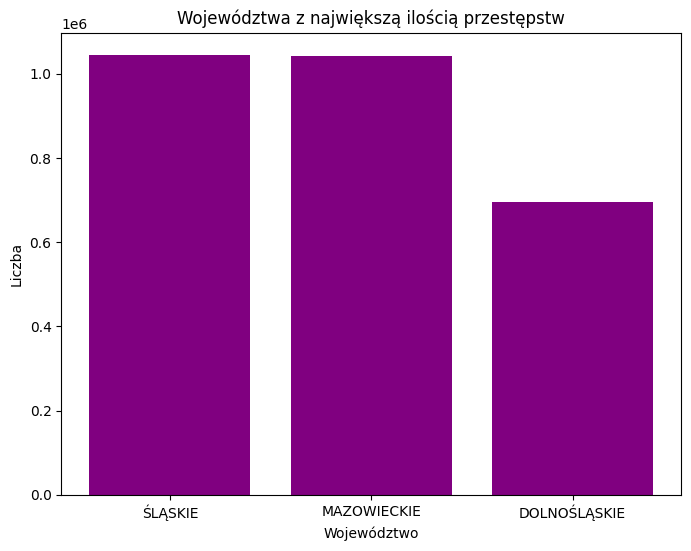

In [39]:
woj_top = woj_sum.nlargest(3)

plt.figure(figsize=(8,6))
plt.bar(woj_top.index, woj_top.values, color='purple')
plt.title('Województwa z największą ilością przestępstw')
plt.ylabel('Liczba')
plt.xlabel('Województwo')
plt.show()

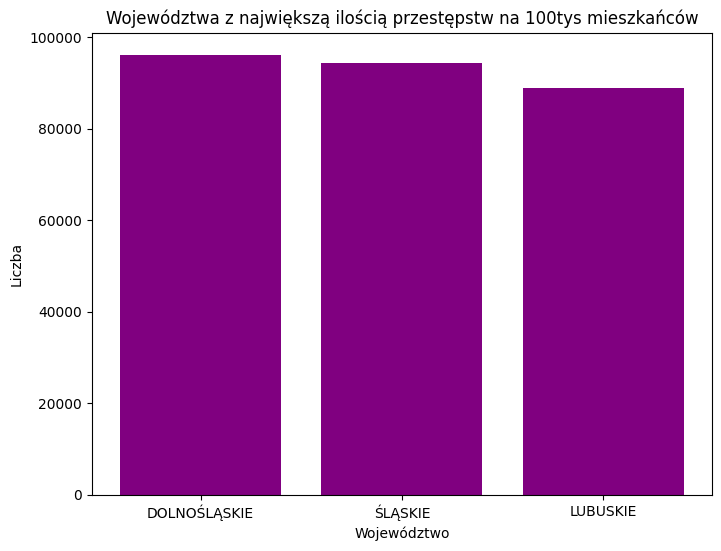

In [40]:
woj_top_100 = woj_sum_100.nlargest(3)

plt.figure(figsize=(8,6))
plt.bar(woj_top_100.index, woj_top_100.values, color='purple')
plt.title('Województwa z największą ilością przestępstw na 100tys mieszkańców')
plt.ylabel('Liczba')
plt.xlabel('Województwo')
plt.show()

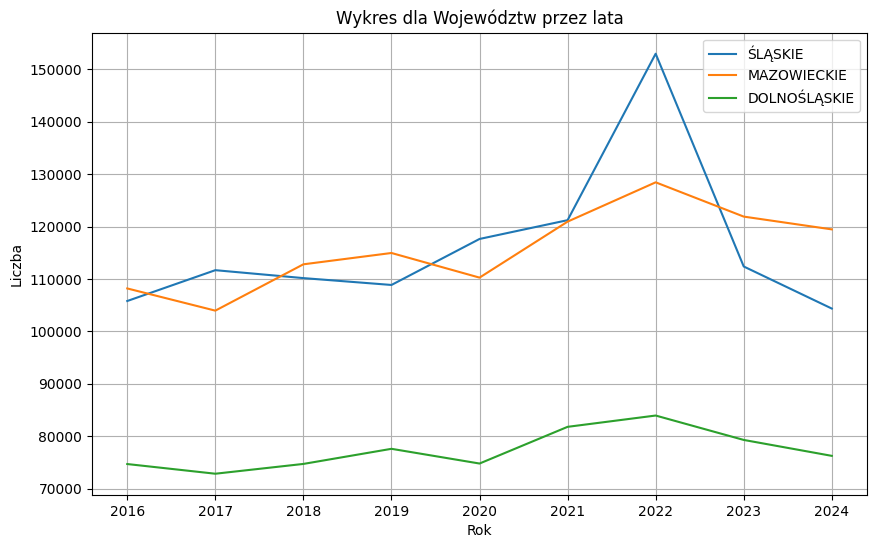

In [41]:
plt.figure(figsize=(10,6))
for i in range(3):
    df = df_woj[df_woj['Województwo'] == woj_top.index[i]]
    df.set_index('Rok', inplace=True)
    plt.plot(df.index, df['Liczba'], label=(woj_top.index[i]))

plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Wykres dla Województw przez lata')
plt.xticks(df.index)
plt.legend()
plt.grid(True)
plt.show()

In [42]:
slask_2022 = df_final[(df_final['Województwo'] == 'ŚLĄSKIE') & (df_final['Kwartał'] == 0)]

#nowa tabela przestawna z przestępstwami jako kolumny
slask_2022 = slask_2022.pivot(index='Rok', columns='Przestępstwo', values='Liczba')

#używamy 'diff' - odejmujemy od liczby w domy roku liczbę z roku poprzedniego
slask_2022 = slask_2022.diff()

#bierzemy pod uwagę rok 2019 - różnicę między 2018 a 2019 - szukamy największej różnicy
slask_2022.loc[2022].sort_values(ascending=False)

Przestępstwo
przeciwko wiarygodności dokumentów                                                32825.0
ogółem                                                                            31746.0
o charakterze gospodarczym                                                        30738.0
przeciwko wymiarowi sprawiedliwości                                                1206.0
z ustawy o przeciwdziałaniu narkomanii                                              693.0
przeciwko działalności instytucji państwowych oraz samorządu terytorialnego         366.0
przeciwko obrotowi gospodarczemu                                                    286.0
o charakterze kryminalnym                                                           276.0
przeciwko życiu i zdrowiu                                                            49.0
przeciwko obrotowi pieniędzmi i papierami wartościowymi                              27.0
przeciwko wolności                                                                   11

### Skok w woj. Śląskim

Na stronie Śląskiej Pożemu otrzymać informacje, że :

- **W 2022 roku przyjęto do służby 523 osoby.**
 -  Codziennie do służby kierowanych jest średnio ponad 1800 policjantów, w tym blisko 550 z samej drogówki. Tylko w ciągu jednego dnia stróże prawa podejmują ponad 1800 interwencji, wykrywają prawie 350 przestępstw i blisko 1400 wykroczeń, zatrzymują na gorącym uczynku prawie 40 osób i przedstawiają przeszło 100 zarzutów.

 - Stan etatowy garnizonu śląskiego na dzień 31.12.2022 r. to 12 469 etatów policyjnych i 1 246 etatów korpusu służby cywilnej. Służbę pełni ***12 124 policjantek i policjantów oraz 1 202 pracowników korpusu służby cywilnej.***, czyli mniej niż w roku 2021, kiedy to służbę pełniło ***12 245 policjantek i policjantów oraz 1 201 pracowników korpusu służby cywilnej.*** - różnica wynosi 120 osób.
--- 
 "W jednym prowadzonym postępowaniu policjanci ujawniają po kilkaset lub nawet kilka tysięcy przestępczych czynów" - tłumaczy, w rozmowie z "GW", podkomisarz Łukasz Kloc z biura prasowego Komendy Miejskiej Policji w Katowicach.

Jako przykład podano Mysłowice, gdzie w 2021 roku popełnionych zostało tam 1955 przestępstw, a w 2022 roku ponad 25 tys. Okazało się, że do statystyk wliczono ilość zarzutów postawionych w jednej ze spraw gospodarczych, w której przedstawiono ich ponad 24 tys.



źródła: 
- https://policja.pl/pol/aktualnosci/227600%2COdprawa-roczna-Slaskiej-Policji.html
- https://slaskie.eska.pl/znaczny-wzrost-przestepstw-w-wojewodztwie-slaskim-policja-podsumowala-rok-aa-BuXe-2dhC-2mXt.html


# Modele

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Dane od 2020 roku

In [44]:
df_models_20 = df_since_2020[(df_since_2020['Województwo'] == 'POLSKA') & 
                          (df_since_2020['Przestępstwo'] == 'ogółem')  & 
                          (df_since_2020['Kwartał'] != 0)]

df_models_20 = df_models_20.drop(columns=['Województwo', 'Przestępstwo', 'Przestępstwo_ID', 'Województwo_ID'])
df_models_20['Data']= pd.to_datetime(df_models_20['Data'])
df_models_20 = df_models_20.set_index('Data')
df_models_20

C:\Users\Wiola\AppData\Local\Temp\ipykernel_13936\125858938.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_models_20['Data']= pd.to_datetime(df_models_20['Data'])


,Kwartał,Rok,Liczba
Data,,,
2020-01-01,1,2020,215963.0
2020-04-01,2,2020,194436.0
2020-07-01,3,2020,165370.0
2020-10-01,4,2020,189639.0
2021-01-01,1,2021,218431.0
2021-04-01,2,2021,227240.0
2021-07-01,3,2021,171903.0
2021-10-01,4,2021,203272.0
2022-01-01,1,2022,230360.0


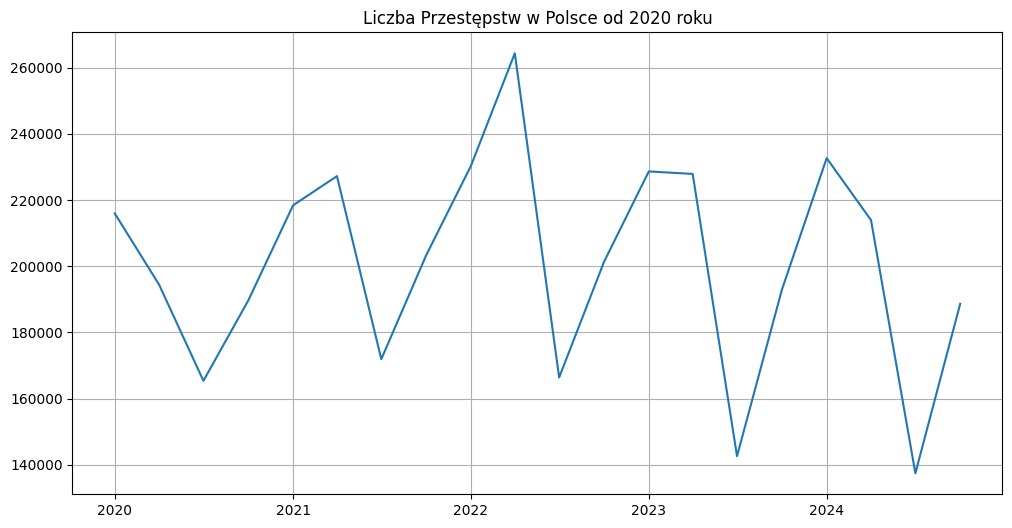

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df_models_20['Liczba'])
plt.grid(True)
plt.title('Liczba Przestępstw w Polsce od 2020 roku')
plt.show()

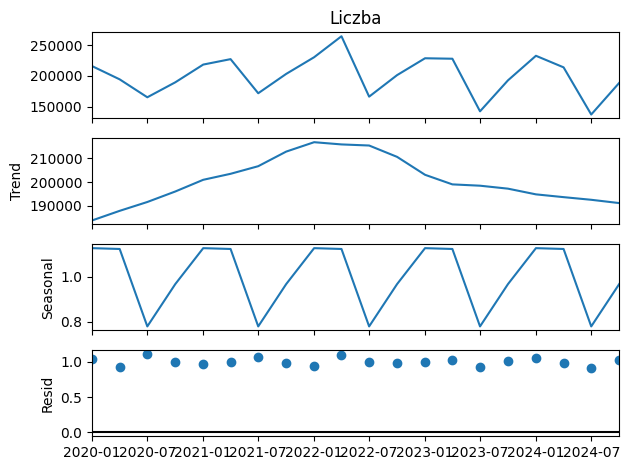

In [46]:
#Trend, seasonal, residuals
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(df_models_20['Liczba'], model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.tight_layout()
plt.show()

* Trend: rośnie do około połowy okresu, a następnie maleje

* Sezonowość: wyraźna, widać powtarzający się cykl

* Residuals: punkty są stabilne i nie wykazują dużych odchyleń

### XGBoost

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [48]:
df_xg = df_models_20.copy()
df_xg['lag_1'] = df_xg['Liczba'].shift(1)
df_xg['lag_2'] = df_xg['Liczba'].shift(2)
df_xg['lag_3'] = df_xg['Liczba'].shift(3)
df_xg['lag_4'] = df_xg['Liczba'].shift(4)
df_xg.dropna()

,Kwartał,Rok,Liczba,lag_1,lag_2,lag_3,lag_4
Data,,,,,,,
2021-01-01,1,2021,218431.0,189639.0,165370.0,194436.0,215963.0
2021-04-01,2,2021,227240.0,218431.0,189639.0,165370.0,194436.0
2021-07-01,3,2021,171903.0,227240.0,218431.0,189639.0,165370.0
2021-10-01,4,2021,203272.0,171903.0,227240.0,218431.0,189639.0
2022-01-01,1,2022,230360.0,203272.0,171903.0,227240.0,218431.0
2022-04-01,2,2022,264382.0,230360.0,203272.0,171903.0,227240.0
2022-07-01,3,2022,166383.0,264382.0,230360.0,203272.0,171903.0
2022-10-01,4,2022,201307.0,166383.0,264382.0,230360.0,203272.0
2023-01-01,1,2023,228666.0,201307.0,166383.0,264382.0,230360.0


In [49]:
X = df_xg.drop(columns='Liczba')
y = df_xg['Liczba']

train_size = int(len(df_xg) * 0.8)  
X_train, X_test = X.iloc[:train_size], X.iloc[(train_size):]
y_train, y_test = y.iloc[:train_size], y.iloc[(train_size):]

In [50]:
xg = XGBRegressor(random_state= 7312)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    cv=3,              
)

grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


In [51]:
xg = XGBRegressor(random_state= 7312,n_estimators=100, max_depth=3, learning_rate=0.01, subsample=1, colsample_bytree=1)
xg.fit(X_train, y_train)
forecast_xg = xg.predict(X_test)

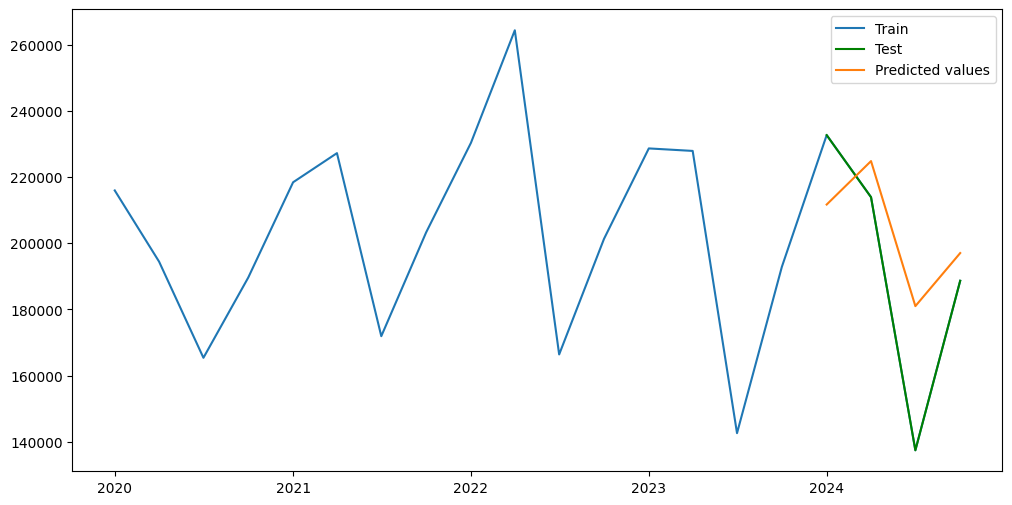

In [52]:
plt.figure(figsize=(12,6))
plt.plot(df_xg.index, df_xg['Liczba'], label='Train')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index,forecast_xg, label='Predicted values')
plt.legend()
plt.show()

In [53]:
mae = mean_absolute_error(y_test,forecast_xg)
mse = mean_squared_error(y_test, forecast_xg)
r_squared = r2_score(y_test, forecast_xg)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R²:",r_squared)

Mean absolute error 20963.85546875
Mean squared error: 632177562.6244507
R²: 0.506334863683283


* MAE: prognozy są umiarkowanie dokładne — model dość dobrze odwzorowuje ogólne trendy i sezonowość
* R²: model wyjaśnia ok. 50% zmienności liczby przestępstw.

### Random forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [55]:
rf = RandomForestRegressor()

param_grid = {'n_estimators': [100,200],
              'max_depth': [2,8], 
              'min_samples_leaf': [3,5], 
              'max_features':[3,5]
              }

rf_rscv = RandomizedSearchCV(rf, param_grid, n_iter=100, cv=5)
rf_rscv.fit(X_train, y_train)

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [2, 8],
                                        'max_features': [3, 5],
                                        'min_samples_leaf': [3, 5],
                                        'n_estimators': [100, 200]})

In [56]:
rf_rscv.best_params_

{'n_estimators': 100, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 2}

In [57]:
rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=3, max_features=5, max_depth=8)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

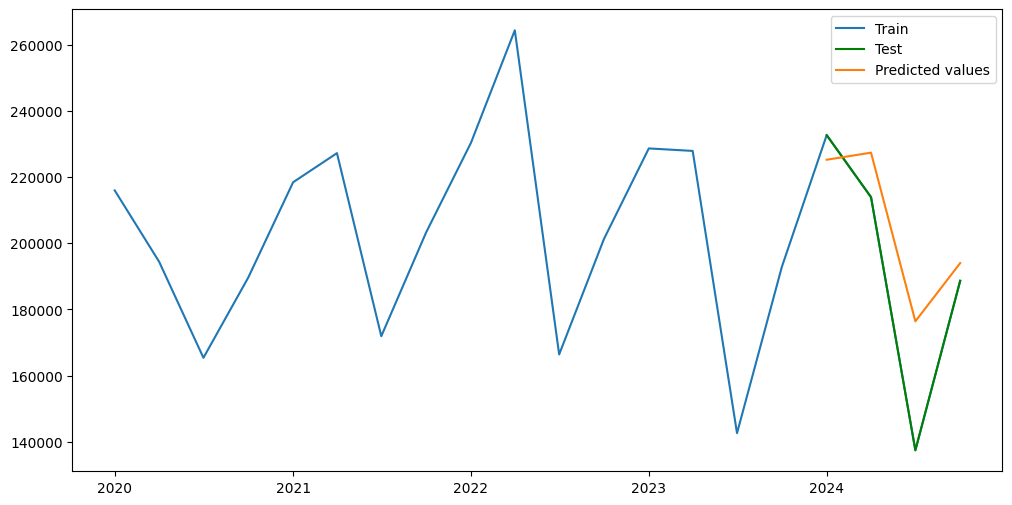

In [58]:
plt.figure(figsize=(12,6))
plt.plot(df_xg.index, df_xg['Liczba'], label='Train')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index, y_pred, label='Predicted values')
plt.legend()
plt.show()

In [59]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R²:",r_squared)

Mean absolute error 16308.286218750029
Mean squared error: 446216896.20395947
R²: 0.6515508649549939


Lepsze wyniki, Random Forest lepiej odwzorowuje ogólny trend i zmienność danych
* R²: model wyjaśnia ok. 70% zmienności liczby przestępstw.

### Sarima

In [60]:
df_sarima = df_models_20.copy()

df_sarima = df_sarima.drop(columns=['Rok','Kwartał'])

train_size = int(len(df_sarima) * 0.8)  
train, test = df_sarima.iloc[:train_size], df_sarima.iloc[(train_size):]

#Stationarity test
result = adfuller(df_sarima, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

ADF Statistic: -1.4494570623006229
p-value: 0.5583498046253357
Non-Stationary


In [61]:
df_sarima_diff = df_sarima.diff().dropna()
result = adfuller(df_sarima_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

ADF Statistic: -11.8097925922399
p-value: 8.916842201111305e-22
Stationary


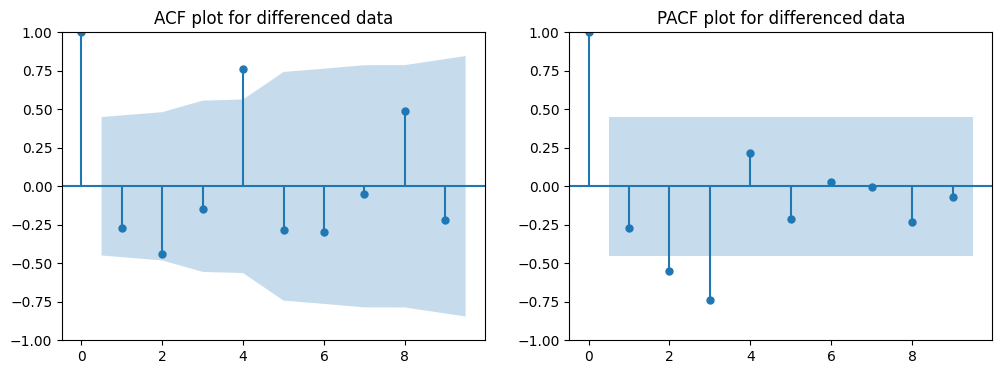

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_sarima_diff, ax=axes[0], title='ACF plot for differenced data')
plot_pacf(df_sarima_diff, ax=axes[1], title='PACF plot for differenced data')
plt.show()

In [63]:
# Fit Sarima Model
p = 3   #from PACF
d = 1   #data is non-stationary
q = 0   #from ACF

P = 0   #from PACF
D = 1   #after differencing data is stationary
Q = 1   #from ACF
s = 4   #season: quarters


model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima = model_sarima.fit()
model_fit_sarima.summary()

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Liczba   No. Observations:                   16
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 4)   Log Likelihood                -123.745
Date:                             Wed, 04 Feb 2026   AIC                            257.489
Time:                                     15:10:13   BIC                            259.479
Sample:                                 01-01-2020   HQIC                           256.235
                                      - 10-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1910      0.305     -0.625      0.532      -0.790       0.408
ar.L2          0.1128      0.476      0.237      0.812      -0.819       1.045
ar.L3          0.0215      0.282      0.076      0.939      -0.531       0.574
ma.S.L4       -0.0518      0.368     -0.141      0.888      -0.774       0.670
sigma2      3.947e+08   3.51e-10   1.12e+18      0.000    3.95e+08    3.95e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.67   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.20   Prob(JB):                         0.79
Heteroskedasticity (H):              15.43   Skew:                            -0.47
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.3e+34. Standard errors may be unstable.
"""

In [64]:
forecast_sarima = model_fit_sarima.forecast(steps=len(test))

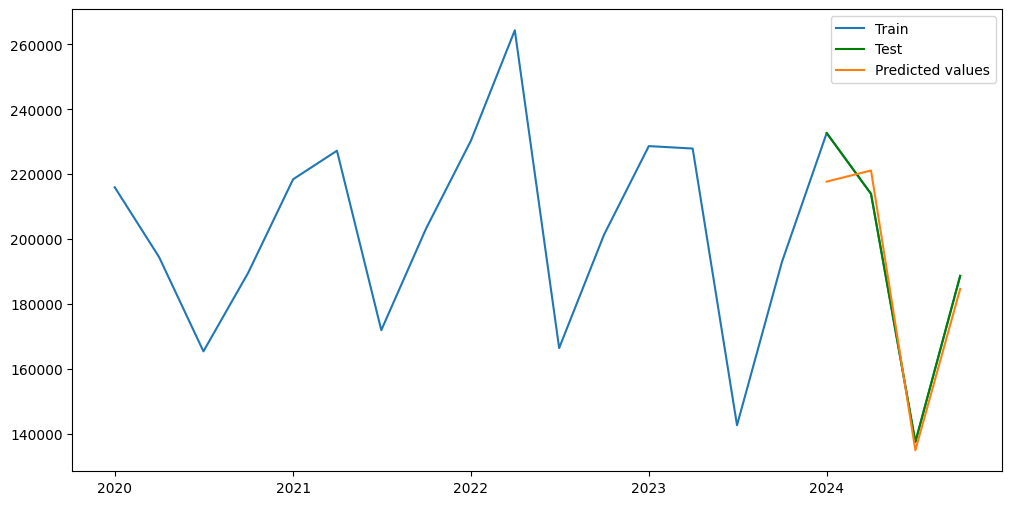

In [65]:
plt.figure(figsize=(12,6))
plt.plot(df_sarima.index, df_sarima, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index,forecast_sarima, label='Predicted values')
plt.legend()
plt.show()

In [66]:
mae = mean_absolute_error(test,forecast_sarima)
mse = mean_squared_error(test, forecast_sarima)
r_squared = r2_score(test, forecast_sarima)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R²:",r_squared)

Mean absolute error 7190.931049409985
Mean squared error: 74754915.20921543
R²: 0.9416241613291407


SARIMA wyjątkowo dobrze uchwyciła sezonowość i trend czasowy. Możliwy overfitting - porónać kilka modeli z użyciem AIC oraz BIC

### Exponential Smoothing

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing

In [68]:
model_ex = ExponentialSmoothing(train, seasonal_periods=4, seasonal='add', trend='add')
model_fit_ex = model_ex.fit()

forecast_ex = model_fit_ex.forecast(steps=len(test))

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


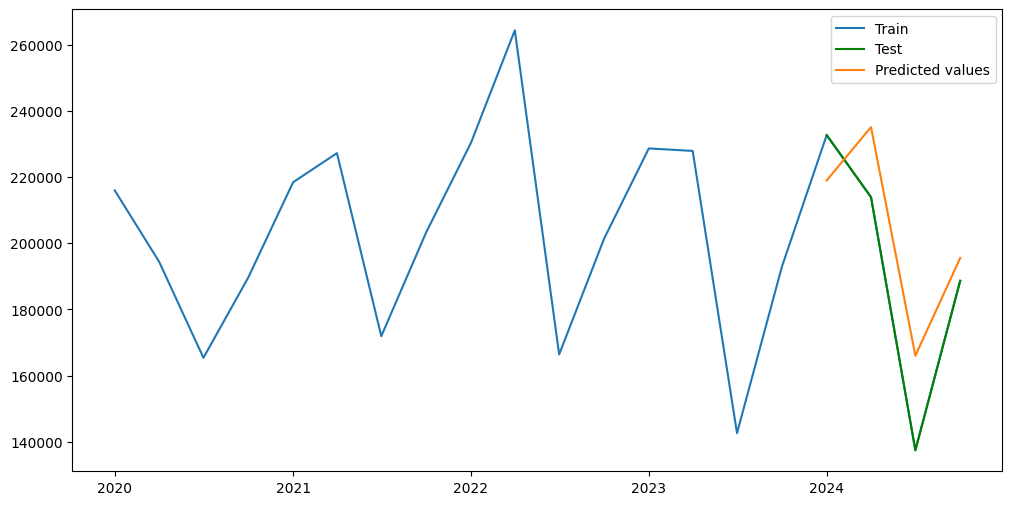

Mean absolute error 17587.959723286163
Mean squared error: 375225518.45777804
R²: 0.7069877710465179


In [69]:
plt.figure(figsize=(12,6))
plt.plot(df_models_20.index, df_models_20['Liczba'], label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index,forecast_ex, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(test,forecast_ex)
mse = mean_squared_error(test, forecast_ex)
r_squared = r2_score(test, forecast_ex)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R²:",r_squared)

### Podsumowanie

* XGBoost:  R² = 0,51, MAE ≈ 20 964, MSE ≈ 632 177 563, nawet dobrze uchwycone ogólne trendy, ale ograniczona zdolność modelowania sezonowości przy samych danych czasowych.

* Random Forest:  R² = 0,70, MAE ≈ 14 816, MSE ≈ 382 193 671, skuteczniejszy od XGBoost'a. Dobrze odwzorowuje zmienność.

* SARIMA: R² = 0,94, MAE ≈ 7 252, MSE ≈ 74 754 915, wyjątkowo dobre wyniki, możliwy overfiiting. Najlepiej srpawidzić różne modele i porównać AIC oraz BIC

* Exponential Smoothing: R² = 0,71, MAE ≈ 17 588, MSE ≈ 375 225 519, lepiej oddaje trend i sezonowość niż Random Forest, ale większy błąd MAE.

## Dane od 2016 roku

In [70]:
df_models_16 = df_final[(df_final['Województwo'] == 'POLSKA') & 
                          (df_final['Przestępstwo'] == 'ogółem')  & 
                          (df_final['Kwartał'] != 0)]

df_models_16 = df_models_16.drop(columns=['Województwo', 'Przestępstwo', 'Przestępstwo_ID', 'Województwo_ID'])
df_models_16['Data']= pd.to_datetime(df_models_16['Data'])
df_models_16 = df_models_16.set_index('Data')

C:\Users\Wiola\AppData\Local\Temp\ipykernel_13936\3839974987.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_models_16['Data']= pd.to_datetime(df_models_16['Data'])


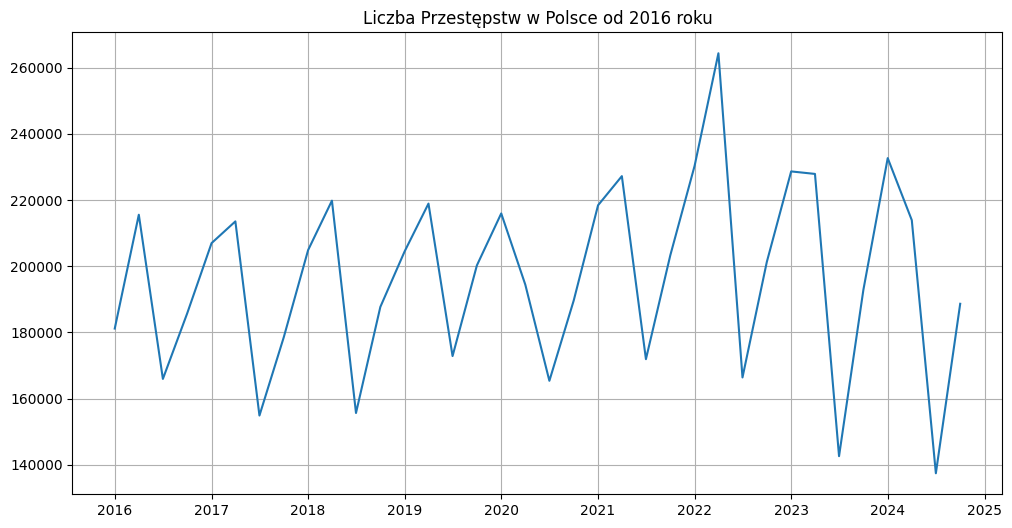

In [71]:
plt.figure(figsize=(12,6))
plt.plot(df_models_16['Liczba'])
plt.grid(True)
plt.title('Liczba Przestępstw w Polsce od 2016 roku')
plt.show()

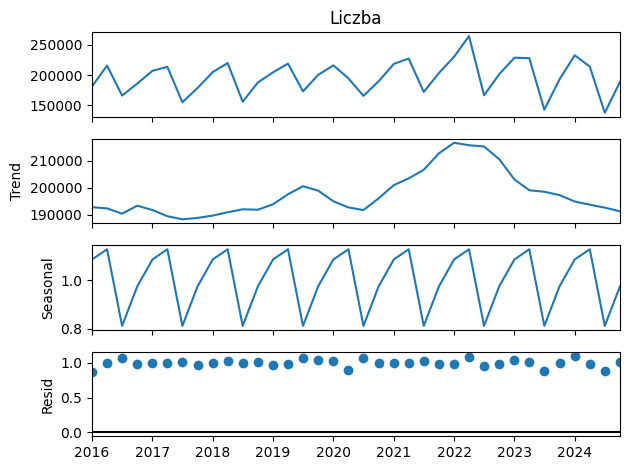

In [72]:
#Trend, seasonal, residuals
result = seasonal_decompose(df_models_16['Liczba'], model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.tight_layout()
plt.show()

* Trend: stopniowo rośnie, lekki spadek w 2020, maksymalna wartości w 2022, nastpępnie maleje 

* Sezonowość: widać wyraźny, powtarzający się cykl

* Residuals: punkty nie wykazują dużych odchyleń

### XGBoost

In [362]:
df_xgb = df_models_16.copy()
df_xgb['lag_1'] = df_xgb['Liczba'].shift(1)
df_xgb['lag_2'] = df_xgb['Liczba'].shift(2)
df_xgb['lag_3'] = df_xgb['Liczba'].shift(3)
df_xgb['lag_4'] = df_xgb['Liczba'].shift(4)
df_xgb['Liczba_roll4'] = df_xgb['Liczba'].shift(1).rolling(4).mean()
df_xgb = df_xgb.dropna()
df_xgb.head(5)

,Kwartał,Rok,Liczba,lag_1,lag_2,lag_3,lag_4,Liczba_roll4
Data,,,,,,,,
2017-01-01,1,2017,206988.0,185783.0,165938.0,215576.0,181162.0,187114.75
2017-04-01,2,2017,213563.0,206988.0,185783.0,165938.0,215576.0,193571.25
2017-07-01,3,2017,154862.0,213563.0,206988.0,185783.0,165938.0,193068.00
2017-10-01,4,2017,178550.0,154862.0,213563.0,206988.0,185783.0,190299.00
2018-01-01,1,2018,204889.0,178550.0,154862.0,213563.0,206988.0,188490.75


In [386]:
X = df_xgb.drop(columns='Liczba')
y = df_xgb['Liczba']

train_size = int(len(df_xgb) * 0.8)  
X_train, X_test = X.iloc[:train_size], X.iloc[(train_size):]
y_train, y_test = y.iloc[:train_size], y.iloc[(train_size):]


xg = XGBRegressor(random_state= 7312)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1             
)

grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


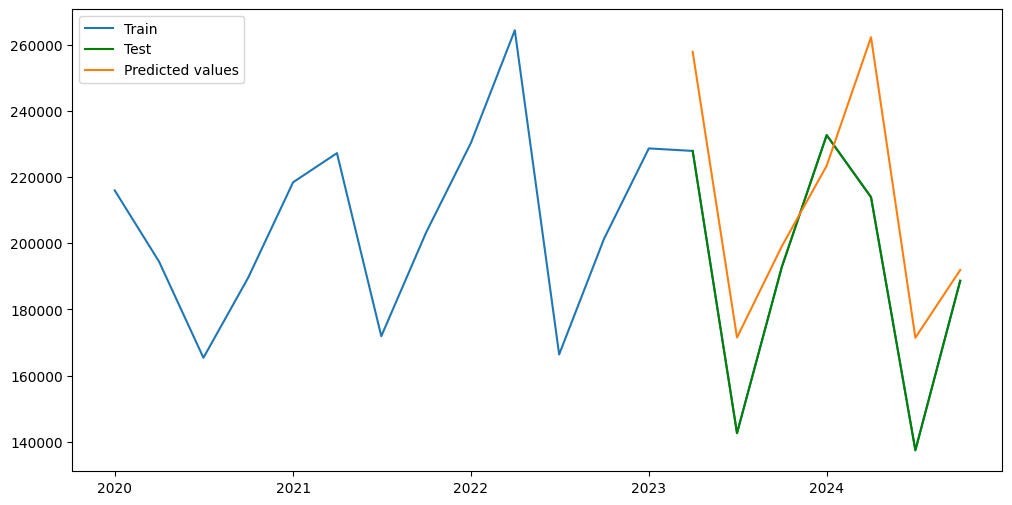

Mean absolute error 22860.051339285714
Mean squared error: 766492943.6109445
R²: 0.3938158909214369


In [387]:
best_model = grid.best_estimator_
forecast_xg = best_model.predict(X_test)


plt.figure(figsize=(12,6))
plt.plot(df_xg.index, df_xg['Liczba'], label='Train')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index,forecast_xg, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test,forecast_xg)
mse = mean_squared_error(y_test, forecast_xg)
r_squared = r2_score(y_test, forecast_xg)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R²:",r_squared)

### Random forest

In [394]:
rf = RandomForestRegressor()

param_grid = {'n_estimators': [100,200],
              'max_depth': [2,8], 
              'min_samples_leaf': [3,5], 
              'max_features':[3,5]
              }

rf_rscv = RandomizedSearchCV(
    rf,
    param_grid,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=1911
)

rf_rscv.fit(X_train, y_train)

rf_rscv.best_params_

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 200, 'min_samples_leaf': 3, 'max_features': 5, 'max_depth': 8}

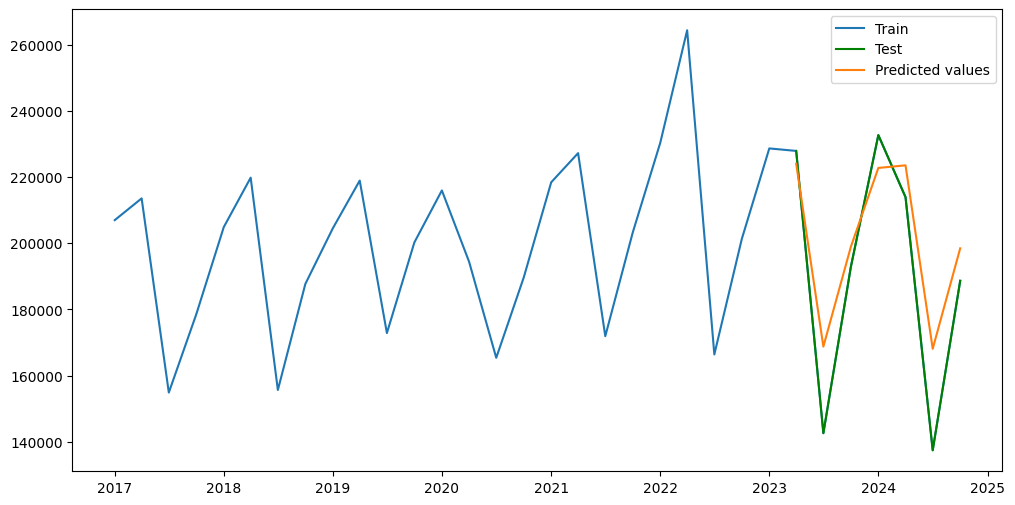

Mean absolute error 13732.052217249051
Mean squared error: 280753479.8590306
R²: 0.7779649513049702


In [393]:
best_model = rf_rscv.best_estimator_
y_pred = best_model.predict(X_test)


plt.figure(figsize=(12,6))
plt.plot(df_xgb.index, df_xgb['Liczba'], label='Train')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index, y_pred, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R²:",r_squared)

### SARIMA

In [370]:
df_sarima = df_models_16.copy()

df_sarima = df_sarima.drop(columns=['Rok','Kwartał'])

train_size = int(len(df_sarima) * 0.8)  
train, test = df_sarima.iloc[:train_size], df_sarima.iloc[(train_size):]

#Stationarity test
result = adfuller(df_sarima, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

ADF Statistic: -1.5701494726735663
p-value: 0.49856878736112265
Non-Stationary


In [371]:
df_sarima_diff = df_sarima.diff().dropna()
result = adfuller(df_sarima_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

ADF Statistic: -3.256411304521414
p-value: 0.016942930612156414
Stationary


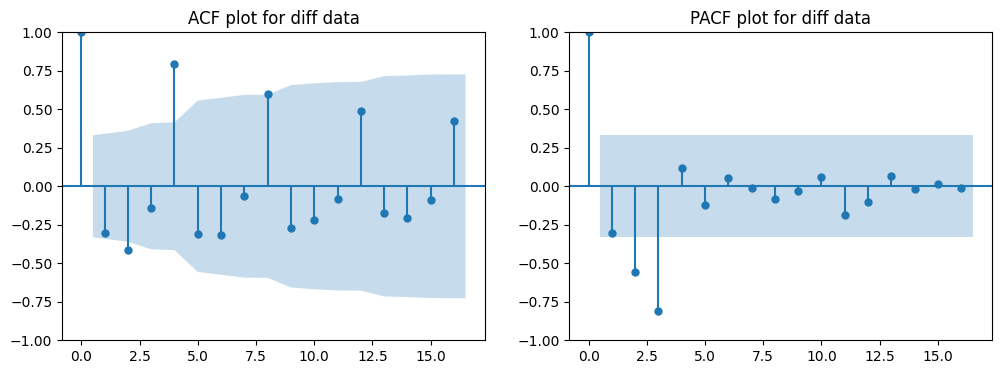

In [372]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_sarima_diff, ax=axes[0], title='ACF plot for diff data')   # ACF
plot_pacf(df_sarima_diff, ax=axes[1], title= 'PACF plot for diff data') # PACF
plt.show()

In [373]:
# Fit Sarima Model
p = 3   #from PACF
d = 1   #data is non-stationary
q = 0   #from ACF

P = 0   #from PACF
D = 1   #after differencing data is stationary
Q = 1   #from ACF
s = 4   #season: quarters


model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima = model_sarima.fit()
model_fit_sarima.summary()

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Liczba   No. Observations:                   28
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 4)   Log Likelihood                -257.969
Date:                             Wed, 04 Feb 2026   AIC                            525.939
Time:                                     19:59:45   BIC                            531.616
Sample:                                 01-01-2016   HQIC                           527.367
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0678      0.090      0.757      0.449      -0.108       0.243
ar.L2          0.0519      0.448      0.116      0.908      -0.826       0.930
ar.L3         -0.0516      0.274     -0.188      0.851      -0.588       0.485
ma.S.L4       -0.0263      0.156     -0.168      0.866      -0.333       0.280
sigma2      2.363e+08   1.75e-09   1.35e+17      0.000    2.36e+08    2.36e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.81   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.03   Prob(JB):                         0.39
Heteroskedasticity (H):               6.90   Skew:                            -0.68
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+33. Standard errors may be unstable.
"""

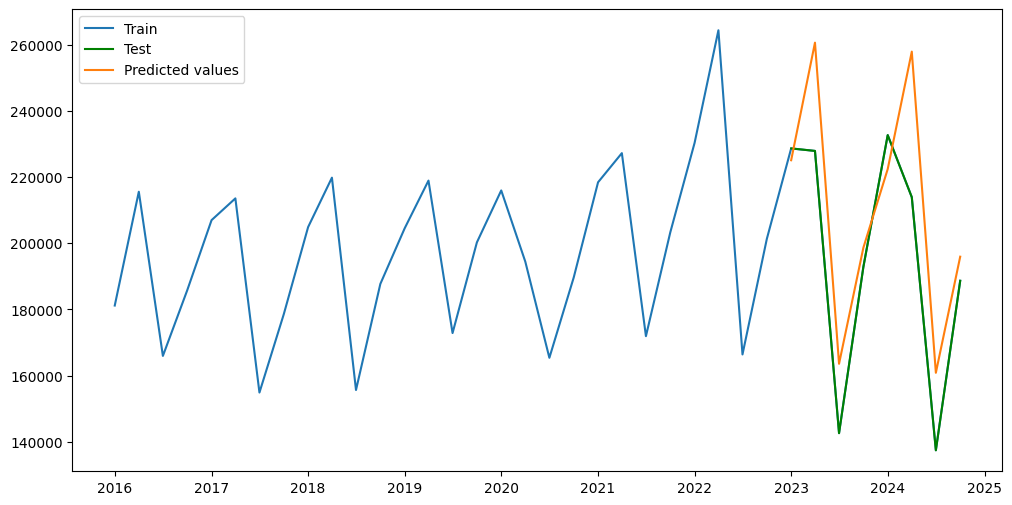

Mean absolute error 18506.142039766208
Mean squared error: 525039121.9776702
R²: 0.5841989242206278


In [374]:
forecast_sarima = model_fit_sarima.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(df_sarima.index, df_sarima, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index,forecast_sarima, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(test,forecast_sarima)
mse = mean_squared_error(test, forecast_sarima)
r_squared = r2_score(test, forecast_sarima)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R²:",r_squared)

### Exponential Smoothing

In [377]:
model_ex = ExponentialSmoothing(train, seasonal_periods=4, seasonal='add', trend='add')
model_fit_ex = model_ex.fit()

forecast_ex = model_fit_ex.forecast(steps=len(test))

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


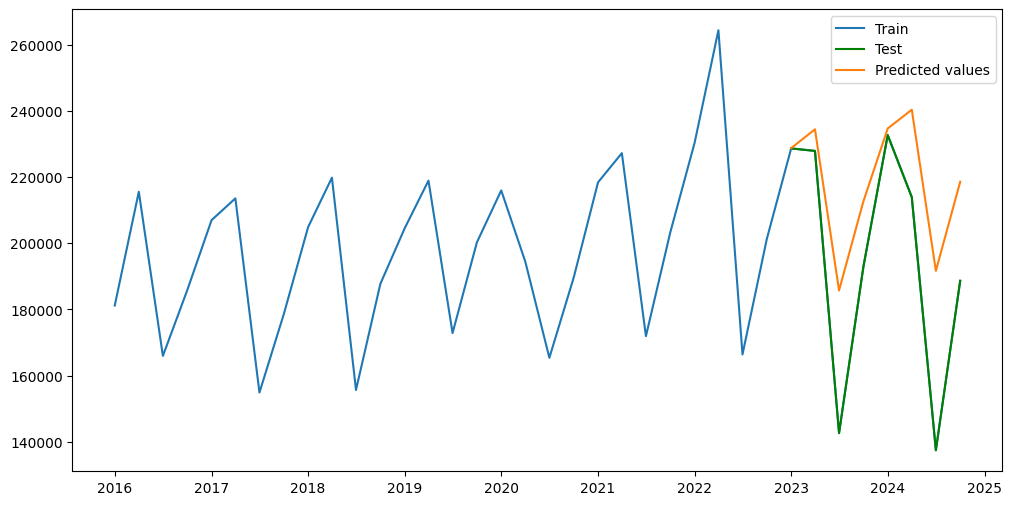

Mean absolute error 22770.532104345002
Mean squared error: 854530769.9744275
R²: 0.32326030848220544


In [379]:
plt.figure(figsize=(12,6))
plt.plot(df_models_16.index, df_models_16['Liczba'], label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index,forecast_ex, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(test,forecast_ex)
mse = mean_squared_error(test, forecast_ex)
r_squared = r2_score(test, forecast_ex)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R²:",r_squared)

### Podusmowanie

* XGBoost: wyniki wyraźnie się poprawiły (R² wzrósł z 0,51 do 0,72, MAE spadł z ~20 964 do ~14 385), co oznacza, że dłuższy okres pozwolił modelowi lepiej uchwycić trend i zależności czasowe.

* Random Forest: również poprawa jakości (R² z 0,70 do 0,78, MAE z ~14 816 do ~13 370), model zyskał na stabilności i lepiej dopasował się do dłuższej historii przestępczości. Najlepsze wyniki dla danych od 2016roku.

* SARIMA: wyniki pogorszyły się (R² spadł z 0,94 do 0,58, MAE wzrósł z ~7 252 do ~18 506), model stracił dopasowanie

* Exponential Smoothing: również słabsze dopasowanie (R² spadł z 0,71 do 0,32, MAE wzrósł z ~17 588 do ~22 771), model nie poradził sobie z bardziej złożonymi wzorcami.

# Dodatkowe dane

In [307]:
bezrobocie = pd.read_csv('stopa_bezrobocia')
rozwody = pd.read_csv('rozwody')
mig_wew = pd.read_csv('saldo migracji wewnętrznych.csv')
mig_zag = pd.read_csv('saldo migracji zagranicznych.csv')
wskazniki = pd.read_csv('wskazniki_%')
wskazniki.isna().sum()

Województwo        0
Przestępstwo       0
Kwartał            0
Rok                0
Wskaźnik_%      2720
dtype: int64

Brakujące dane we wskaźnikach występują z braku danych w przestępstwach

In [308]:
df_dane = df_final.copy()

#dodajemy dane poprzez merge
df_dane = df_dane.merge(wskazniki, on =  ['Województwo','Przestępstwo','Kwartał','Rok'], how='left')
df_dane = df_dane.merge(bezrobocie, on = ['Województwo','Kwartał','Rok'], how='left')
df_dane = df_dane.merge(rozwody, on = ['Województwo','Kwartał','Rok'], how='left')
df_dane = df_dane.merge(mig_wew, on = ['Województwo','Kwartał','Rok'], how='left')
df_dane = df_dane.merge(mig_zag, on = ['Województwo','Kwartał','Rok'], how='left')
df_dane = df_dane.merge(ludnosc, on = ['Województwo','Kwartał','Rok'], how='left')
df_dane.isna().sum()

Województwo                        0
Przestępstwo                       0
Kwartał                            0
Rok                                0
Liczba                          2720
Data                               0
Przestępstwo_ID                    0
Województwo_ID                     0
Wskaźnik_%                      2720
Stopa bezrobocia_%                 0
Rozwody                            0
saldo migracji wewnętrznych        0
saldo migracji zagranicznych       0
Ludność                            0
Ludność_100tys                     0
dtype: int64

In [309]:
df_dane.columns

Index(['Województwo', 'Przestępstwo', 'Kwartał', 'Rok', 'Liczba', 'Data',
       'Przestępstwo_ID', 'Województwo_ID', 'Wskaźnik_%', 'Stopa bezrobocia_%',
       'Rozwody', 'saldo migracji wewnętrznych',
       'saldo migracji zagranicznych', 'Ludność', 'Ludność_100tys'],
      dtype='object')

## Korelacja

In [157]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_columns = ['Przestępstwo','Województwo']
encoded_array = encoder.fit_transform(df_dane[encoded_columns])
encoded_feature_names = encoder.get_feature_names_out(encoded_columns)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names)

encoded_df = pd.concat([df_dane, encoded_df], axis=1)

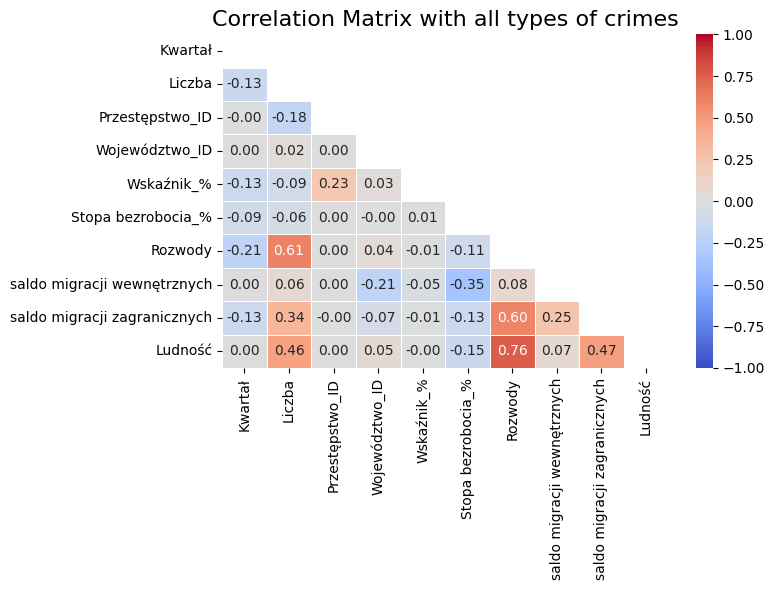

In [471]:
import seaborn as sns
import numpy as np

df_corr = df_dane.copy()
df_corr  = df_corr.drop(columns  = ['Województwo', 'Przestępstwo','Data','Rok','Ludność_100tys'])
corr_matrix = df_corr.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    mask=mask,               
    annot=True,              
    fmt=".2f",                
    cmap="coolwarm",           
    vmin=-1, vmax=1,          
    linewidths=0.5  
)

plt.title("Correlation Matrix with all types of crimes", fontsize=16)
plt.tight_layout()
plt.show()

## Korelacja dla przestępstw ogółem

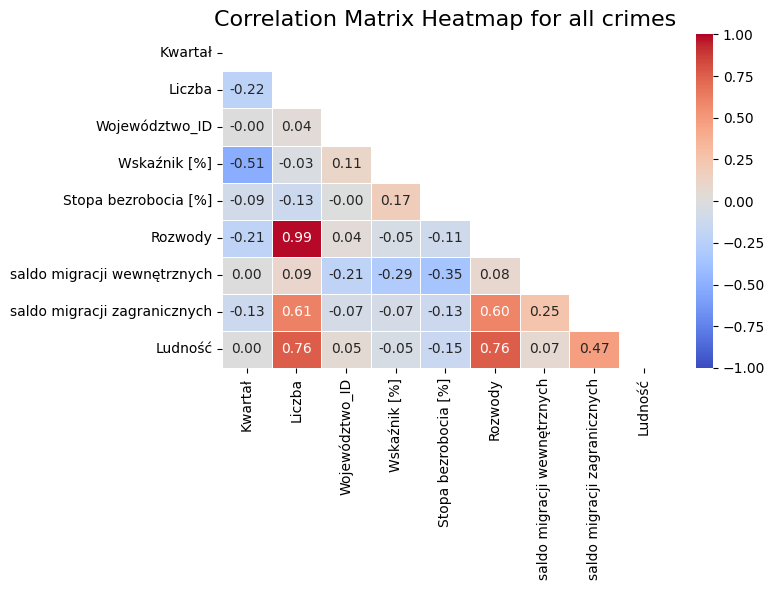

In [164]:
corr_ogolem = df_dane[df_dane['Przestępstwo']=='ogółem']
corr_ogolem  = corr_ogolem.drop(columns  = ['Województwo', 'Przestępstwo','Przestępstwo_ID','Data','Rok','Ludność_100tys'])
corr_ogolem = corr_ogolem.corr()
mask = np.triu(np.ones_like(corr_ogolem, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_ogolem,
    mask=mask,               
    annot=True,              
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5  
)

plt.title("Correlation Matrix Heatmap for all crimes", fontsize=16)
plt.tight_layout()
plt.show()

Najwięszką kolerację z liczbą przestępstw możemy zauważyc dla rozwodów, ludności oraz migracji zagranicznych 

## Wykresy danych dodatkowych

### Wskaźniki

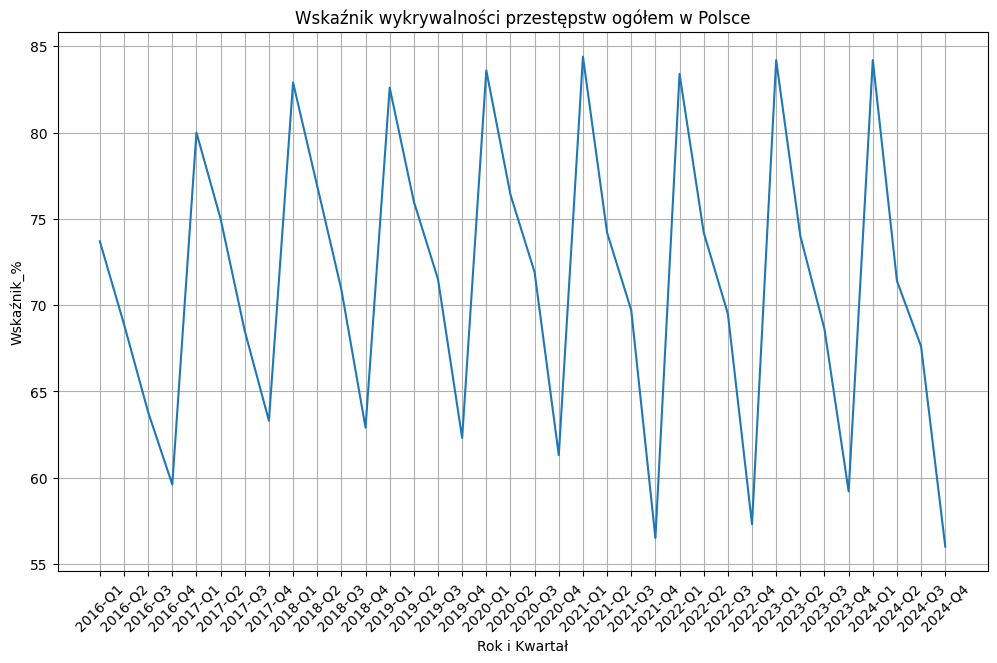

In [478]:
wskaźniki_wykres =wskazniki[(wskazniki['Przestępstwo']=='ogółem')&(wskazniki['Kwartał']!=0)&(wskazniki['Województwo']=='POLSKA')].sort_values(['Rok', 'Kwartał'])
wskaźniki_wykres['Data'] = wskaźniki_wykres['Rok'].astype(str) + '-Q' + wskaźniki_wykres['Kwartał'].astype(str)

plt.figure(figsize=(12,7))
plt.plot(wskaźniki_wykres['Data'], wskaźniki_wykres['Wskaźnik_%'])
plt.title('Wskaźnik wykrywalności przestępstw ogółem w Polsce')
plt.xlabel('Rok i Kwartał')
plt.ylabel('Wskaźnik_%')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Wskaźnik wykazuje wyraźną sezonowość – najwyższe wartości przypadają na pierwsze kwartały, a najniższe na czwarte kwartały roku.

### Rozwody

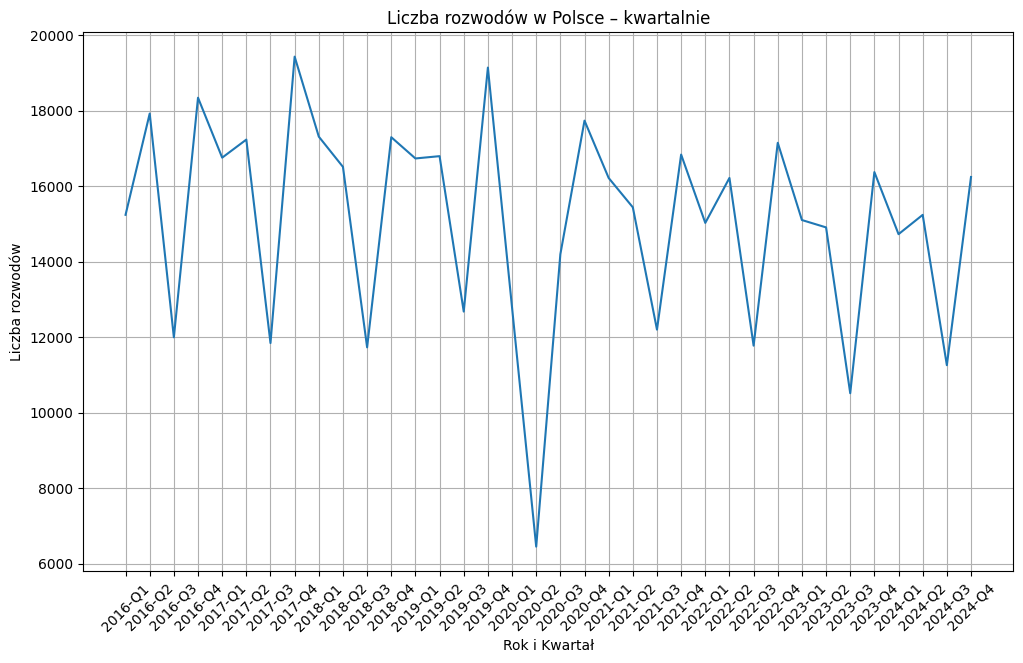

In [175]:
rozwody_wykres =rozwody[(rozwody['Kwartał']!=0)&(rozwody['Województwo']=='POLSKA')].sort_values(['Rok', 'Kwartał'])
rozwody_wykres['Data'] = rozwody_wykres['Rok'].astype(str) + '-Q' + rozwody_wykres['Kwartał'].astype(str)

plt.figure(figsize=(12,7))
plt.plot(rozwody_wykres['Data'], rozwody_wykres['Rozwody'])
plt.title('Liczba rozwodów w Polsce – kwartalnie')
plt.xlabel('Rok i Kwartał')
plt.ylabel('Liczba rozwodów')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Możemy zauważyć spadek liczby rozwodów w 2 kwartale 2020 roku, co może być konsekwencją ograniczeń pandemicznych, w tym utrudnionego dostępu do sądów i obowiązujących zakazów wychodzenia z domu.

In [196]:
df_roz = rozwody[(rozwody["Województwo"] != 'POLSKA') & (rozwody["Kwartał"] == 0)]
roz_sum = df_roz.groupby('Województwo')['Rozwody'].sum().sort_values(ascending=False)
roz_sum

Województwo
MAZOWIECKIE            79968.0
ŚLĄSKIE                67748.0
WIELKOPOLSKIE          47424.0
DOLNOŚLĄSKIE           47282.0
MAŁOPOLSKIE            38908.0
ŁÓDZKIE                34946.0
POMORSKIE              32349.0
KUJAWSKO-POMORSKIE     32069.0
LUBELSKIE              28089.0
ZACHODNIOPOMORSKIE     27297.0
WARMIŃSKO-MAZURSKIE    22082.0
PODKARPACKIE           21585.0
PODLASKIE              15471.0
LUBUSKIE               14223.0
ŚWIĘTOKRZYSKIE         13555.0
OPOLSKIE               12461.0
Name: Rozwody, dtype: float64

In [198]:
rozwody_merged = regions.merge(roz_sum, left_on='nazwa', right_on='Województwo', how='left')
rozwody_merged

,id,nazwa,geometry,Rozwody
0,1,ŚLĄSKIE,"MULTIPOLYGON (((19.4698 50.9154, 19.4689 50.91...",67748.0
1,2,OPOLSKIE,"POLYGON ((17.8122 51.1349, 17.812 51.1335, 17....",12461.0
2,3,WIELKOPOLSKIE,"POLYGON ((16.8487 53.6287, 16.8496 53.6287, 16...",47424.0
3,4,ZACHODNIOPOMORSKIE,"POLYGON ((16.3716 54.4414, 16.372 54.442, 16.3...",27297.0
4,5,ŚWIĘTOKRZYSKIE,"POLYGON ((19.7471 50.866, 19.7474 50.8666, 19....",13555.0
5,6,KUJAWSKO-POMORSKIE,"POLYGON ((18.6768 53.6907, 18.6785 53.6908, 18...",32069.0
6,7,PODLASKIE,"POLYGON ((21.926 53.0781, 21.9261 53.0783, 21....",15471.0
7,8,DOLNOŚLĄSKIE,"POLYGON ((16.4162 51.7849, 16.419 51.785, 16.4...",47282.0
8,9,PODKARPACKIE,"POLYGON ((22.5437 50.3563, 22.5459 50.3572, 22...",21585.0
9,10,MAŁOPOLSKIE,"POLYGON ((20.5632 50.1997, 20.5625 50.1991, 20...",38908.0


In [238]:
roz_lud = df_roz.drop(columns=['Kwartał'])

roz_merged = roz_lud.merge(ludnosc_100, on=['Województwo', 'Rok'], how='left' )
roz_merged['Rozwody_na_100'] = roz_merged['Rozwody']/roz_merged["Ludność_100tys"]

roz_sum_100 = roz_merged.groupby('Województwo')['Rozwody_na_100'].sum().sort_values(ascending=False)

roz_merged_100 = regions.merge(roz_sum_100, left_on='nazwa', right_on='Województwo', how='left')

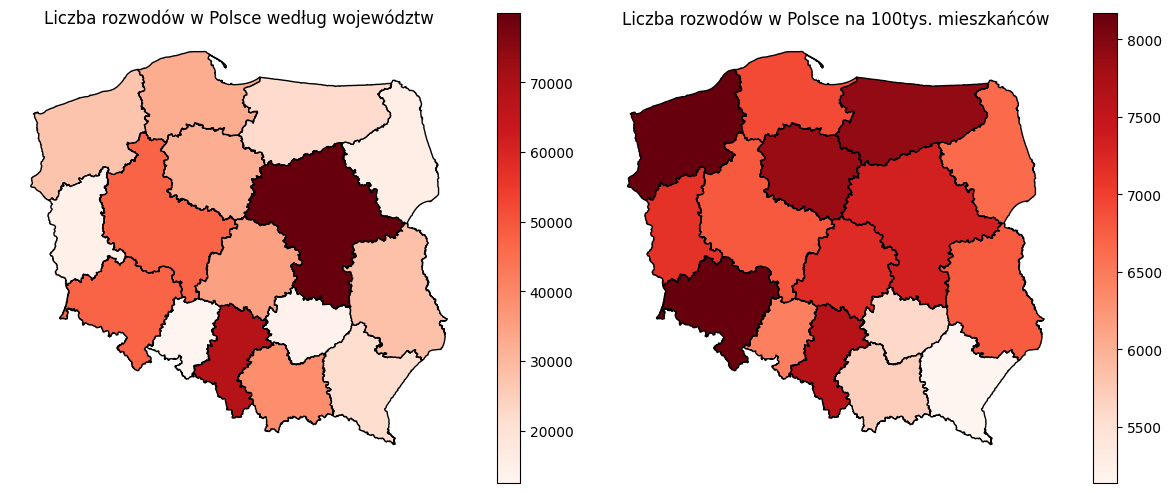

In [239]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

rozwody_merged.plot(column='Rozwody',cmap='Reds',legend=True,edgecolor='black',ax=axes[0])
axes[0].set_title('Liczba rozwodów w Polsce według województw')
axes[0].axis('off')


roz_merged_100.plot(column='Rozwody_na_100', cmap='Reds',legend=True, edgecolor='black',ax=axes[1])
axes[1].set_title('Liczba rozwodów w Polsce na 100tys. mieszkańców')
axes[1].axis('off')
plt.tight_layout()
plt.show()


### Migracje zagraniczne

Wskaźniki migracji kwartalnych zostały obliczone metodą Dentona, dlatego przyjrzymy się tylko wartościom rocznym.

In [225]:
df_mig_zag = mig_zag[(mig_zag["Województwo"] != 'POLSKA') & (mig_zag["Kwartał"] == 0)]

mig_zag_sum = df_mig_zag.groupby('Województwo')['saldo migracji zagranicznych'].sum().sort_values(ascending=False)
mig_zag_sum

Województwo
MAZOWIECKIE            19525.0
MAŁOPOLSKIE             7138.0
PODLASKIE               3405.0
LUBELSKIE               3032.0
DOLNOŚLĄSKIE            3027.0
PODKARPACKIE            2960.0
WIELKOPOLSKIE           2529.0
ŁÓDZKIE                 2134.0
POMORSKIE               1852.0
ŚWIĘTOKRZYSKIE          1321.0
KUJAWSKO-POMORSKIE       998.0
LUBUSKIE                 604.0
ZACHODNIOPOMORSKIE       591.0
WARMIŃSKO-MAZURSKIE    -1040.0
OPOLSKIE               -4311.0
ŚLĄSKIE                -5136.0
Name: saldo migracji zagranicznych, dtype: float64

In [249]:
migracje_zag_merged = regions.merge(mig_zag_sum, left_on='nazwa', right_on='Województwo', how='left')

In [250]:
mig_zag_lud = df_mig_zag.drop(columns=['Kwartał'])

mig_zag_merged = mig_zag_lud.merge(ludnosc_100, on=['Województwo', 'Rok'], how='left' )
mig_zag_merged['Migracje_na_100'] = mig_zag_merged['saldo migracji zagranicznych']/mig_zag_merged["Ludność_100tys"]

mig_zag_sum_100 = mig_zag_merged.groupby('Województwo')['Migracje_na_100'].sum().sort_values(ascending=False)

mig_zag_merged_100 = regions.merge(mig_zag_sum_100, left_on='nazwa', right_on='Województwo', how='left')

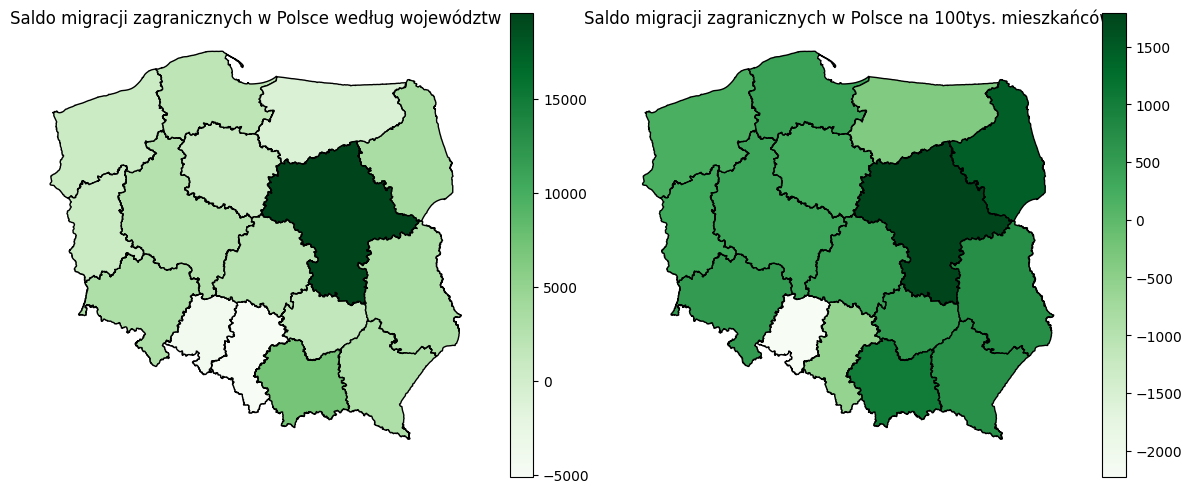

In [254]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

migracje_zag_merged.plot(column='saldo migracji zagranicznych',cmap='Greens',legend=True, edgecolor='black',ax=axes[0])
axes[0].set_title('Saldo migracji zagranicznych w Polsce według województw')
axes[0].axis('off')


mig_zag_merged_100.plot(column='Migracje_na_100', cmap='Greens',legend=True, edgecolor='black',ax=axes[1])
axes[1].set_title('Saldo migracji zagranicznych w Polsce na 100tys. mieszkańców')
axes[1].axis('off')
plt.tight_layout()
plt.show()



In [480]:
df_mig_wew = mig_wew[(mig_wew["Województwo"] != 'POLSKA') & (mig_wew["Kwartał"] == 0)]

mig_wew_sum = df_mig_wew.groupby('Województwo')['saldo migracji wewnętrznych'].sum().sort_values(ascending=False)
mig_wew_sum

Województwo
MAZOWIECKIE            104815.0
POMORSKIE               39697.0
MAŁOPOLSKIE             36812.0
DOLNOŚLĄSKIE            30160.0
WIELKOPOLSKIE           11766.0
ZACHODNIOPOMORSKIE      -6924.0
OPOLSKIE                -7149.0
LUBUSKIE                -8302.0
PODLASKIE              -16758.0
ŁÓDZKIE                -18294.0
KUJAWSKO-POMORSKIE     -18863.0
PODKARPACKIE           -22912.0
ŚWIĘTOKRZYSKIE         -23099.0
WARMIŃSKO-MAZURSKIE    -23521.0
ŚLĄSKIE                -31312.0
LUBELSKIE              -46116.0
Name: saldo migracji wewnętrznych, dtype: float64

### Migracje wewnętrzne

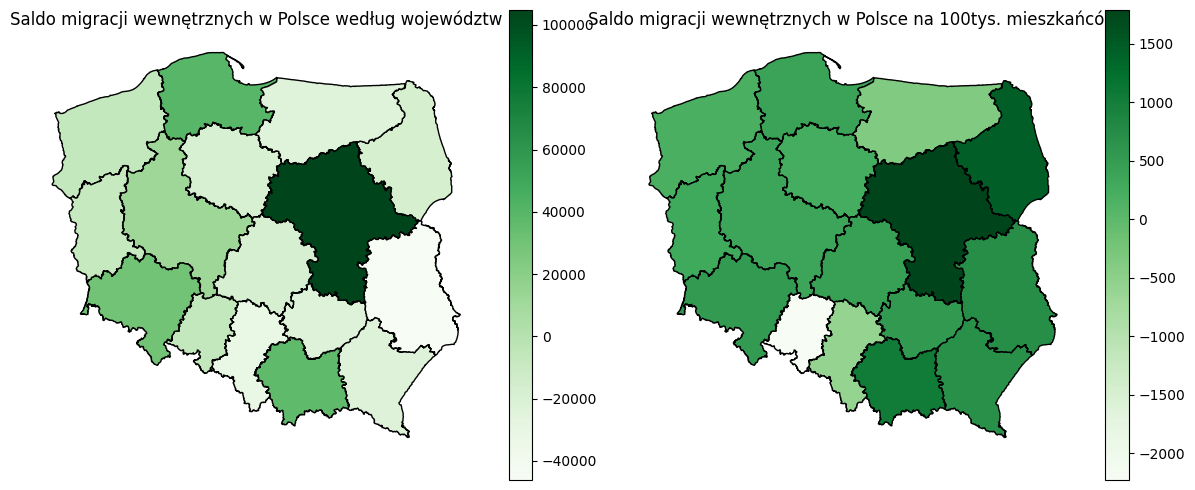

In [484]:
migracje_wew_merged = regions.merge(mig_wew_sum, left_on='nazwa', right_on='Województwo', how='left')

mig_wew_lud = df_mig_wew.drop(columns=['Kwartał'])

mig_wew_merged = mig_zag_lud.merge(ludnosc_100, on=['Województwo', 'Rok'], how='left' )
mig_wew_merged['Migracje_na_100'] = mig_wew_merged['saldo migracji zagranicznych']/mig_wew_merged["Ludność_100tys"]

mig_wew_sum_100 = mig_wew_merged.groupby('Województwo')['Migracje_na_100'].sum().sort_values(ascending=False)

mig_wew_merged_100 = regions.merge(mig_wew_sum_100, left_on='nazwa', right_on='Województwo', how='left')



fig, axes = plt.subplots(1, 2, figsize=(12, 5))

migracje_wew_merged.plot(column='saldo migracji wewnętrznych',cmap='Greens',legend=True, edgecolor='black',ax=axes[0])
axes[0].set_title('Saldo migracji wewnętrznych w Polsce według województw')
axes[0].axis('off')


mig_wew_merged_100.plot(column='Migracje_na_100', cmap='Greens',legend=True, edgecolor='black',ax=axes[1])
axes[1].set_title('Saldo migracji wewnętrznych w Polsce na 100tys. mieszkańców')
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Modele z nowymi danymi

## Random Forest for data since 2016

In [331]:
df_dane.head(5)

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Data,Przestępstwo_ID,Województwo_ID,Wskaźnik_%,Stopa bezrobocia_%,Rozwody,saldo migracji wewnętrznych,saldo migracji zagranicznych,Ludność,Ludność_100tys
0,POLSKA,ogółem,0,2016,748459.0,2016-Q0,2,9,66.5,8.941667,63497.0,0.0,1505.0,38432992,384.32992
1,DOLNOŚLĄSKIE,ogółem,0,2016,74705.0,2016-Q0,2,0,60.7,7.883333,5077.0,2659.0,150.0,2903710,29.03710
2,KUJAWSKO-POMORSKIE,ogółem,0,2016,37144.0,2016-Q0,2,1,68.6,12.475000,3743.0,-1719.0,97.0,2083927,20.83927
3,LUBELSKIE,ogółem,0,2016,31221.0,2016-Q0,2,2,72.9,10.775000,3129.0,-4452.0,385.0,2133340,21.33340
4,LUBUSKIE,ogółem,0,2016,22775.0,2016-Q0,2,3,69.5,9.358333,1885.0,-740.0,-91.0,1017376,10.17376


In [351]:
df_dane_2016 = df_dane[(df_dane['Województwo'] == 'POLSKA') & 
                        (df_dane['Kwartał'] != 0) &
                        (df_dane['Przestępstwo'] == 'ogółem')]

df_dane_2016 = df_dane_2016.drop(columns=['Województwo',
                                        'Przestępstwo', 
                                        'Przestępstwo_ID', 
                                        'Województwo_ID', 
                                        'saldo migracji wewnętrznych',
                                        'Ludność_100tys'])

df_dane_2016['Data']= pd.to_datetime(df_dane_2016['Data'])
df_dane_2016 = df_dane_2016.set_index('Data')

C:\Users\Wiola\AppData\Local\Temp\ipykernel_13936\2106186670.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dane_2016['Data']= pd.to_datetime(df_dane_2016['Data'])


In [352]:
df_dane_2016['Liczba_lag1'] = df_dane_2016['Liczba'].shift(1)
df_dane_2016['Liczba_lag2'] = df_dane_2016['Liczba'].shift(2)
df_dane_2016['Liczba_lag3'] = df_dane_2016['Liczba'].shift(3)
df_dane_2016['Liczba_lag4'] = df_dane_2016['Liczba'].shift(4)
df_dane_2016['Liczba_roll4'] = df_dane_2016['Liczba'].shift(1).rolling(4).mean()

df_dane_2016 = df_dane_2016.dropna()

In [353]:
X = df_dane_2016.drop(columns='Liczba')
y = df_dane_2016['Liczba']

train_size = int(len(df_dane_2016) * 0.8)  
X_train, X_test = X.iloc[:train_size], X.iloc[(train_size):]
y_train, y_test = y.iloc[:train_size], y.iloc[(train_size):]


rf = RandomForestRegressor()

param_grid = {'n_estimators': [100,200],
              'max_depth': [2,8], 
              'min_samples_leaf': [3,5], 
              'max_features':[3,5]
              }

rf_rscv = RandomizedSearchCV(
    rf,
    param_grid,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=1911
)

rf_rscv.fit(X_train, y_train)

rf_rscv.best_params_

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 200, 'min_samples_leaf': 3, 'max_features': 5, 'max_depth': 8}

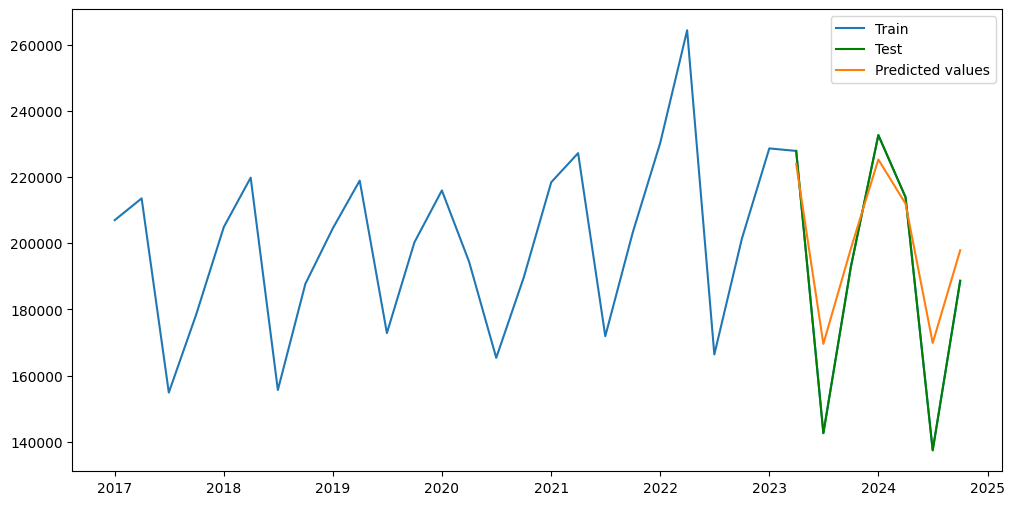

Mean absolute error 12491.42559064945
Mean squared error: 281474203.1894166
R²: 0.7773949642834799


In [354]:
best_model = rf_rscv.best_estimator_
y_pred = best_model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(df_dane_2016.index, df_dane_2016['Liczba'], label='Train')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index, y_pred, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R²:",r_squared)

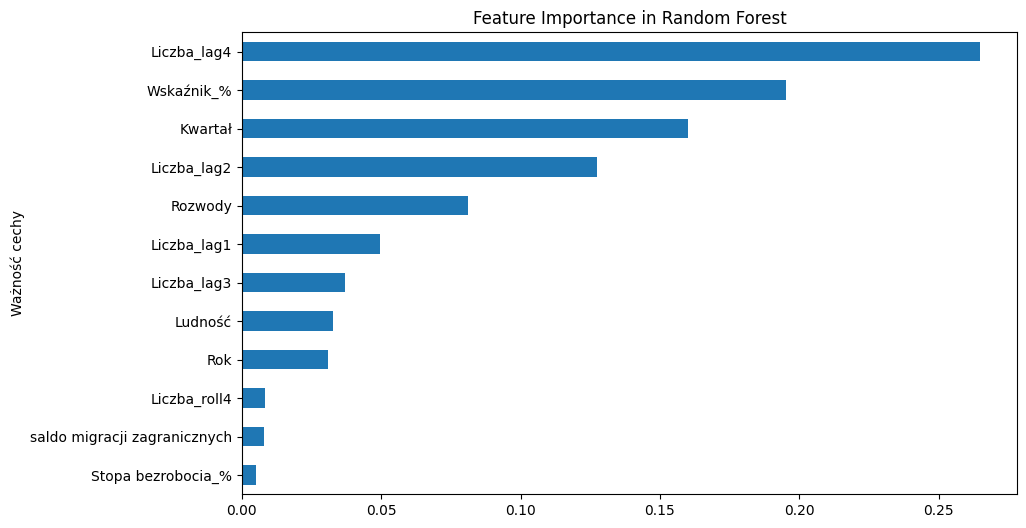

In [355]:
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=True)


plt.figure(figsize=(10,6))
feature_importances.plot(kind='barh')
plt.title("Feature Importance in Random Forest")
plt.ylabel("Ważność cechy")
plt.show()

## SARIMAX for data since 2020

In [409]:
df_dane_2020 = df_dane_2016[(df_dane_2016['Rok']!=2016)&
                            (df_dane_2016['Rok']!=2017)&
                            (df_dane_2016['Rok']!=2018)&
                            (df_dane_2016['Rok']!=2019)]
df_dane_2020.head(5)

,Kwartał,Rok,Liczba,Wskaźnik_%,Stopa bezrobocia_%,Rozwody,saldo migracji zagranicznych,Ludność,Liczba_lag1,Liczba_lag2,Liczba_lag3,Liczba_lag4,Liczba_roll4
Data,,,,,,,,,,,,,
2020-01-01,1,2020,215963.0,83.6,5.466667,12784.0,1128.0,38076750,200259.0,172843.0,218938.0,204517.0,199139.25
2020-04-01,2,2020,194436.0,76.4,5.966667,6451.0,1182.0,38177724,215963.0,200259.0,172843.0,218938.0,202000.75
2020-07-01,3,2020,165370.0,71.9,6.100000,14195.0,1083.0,38096500,194436.0,215963.0,200259.0,172843.0,195875.25
2020-10-01,4,2020,189639.0,61.3,6.166667,17734.0,1088.0,38088564,165370.0,194436.0,215963.0,200259.0,194007.00
2021-01-01,1,2021,218431.0,84.4,6.500000,16215.0,848.0,37895714,189639.0,165370.0,194436.0,215963.0,191352.00


In [465]:
df_sarima = df_dane_2020.copy()

df_sarima = df_sarima.drop(columns=['Liczba_lag1','Liczba_lag2','Liczba_lag3',
                                    'Liczba_lag4','Liczba_roll4','Rok','Kwartał',
                                    'Stopa bezrobocia_%'])

X = df_sarima.drop(columns='Liczba')
y = df_sarima['Liczba']

train_size = int(len(df_sarima) * 0.8)  
X_train, X_test = X.iloc[:train_size], X.iloc[(train_size):]
y_train, y_test = y.iloc[:train_size], y.iloc[(train_size):]

In [466]:
# Fit Sarima Model
p = 3   #from PACF
d = 1   #data is non-stationary
q = 0   #from ACF

P = 0   #from PACF
D = 1   #after differencing data is stationary
Q = 1   #from ACF
s = 4   #season: quarters

model_sarima = SARIMAX(
    y_train,
    exog=X_train,
    order=(p, d, q),            
    seasonal_order=(P, D, Q, s), 
    enforce_stationarity=False,
    enforce_invertibility=False
)

#model_sarima = SARIMAX(y_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima = model_sarima.fit()
model_fit_sarima.summary()

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Liczba   No. Observations:                   16
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 4)   Log Likelihood                 -62.907
Date:                             Wed, 04 Feb 2026   AIC                            143.813
Time:                                     20:54:53   BIC                            141.939
Sample:                                 01-01-2020   HQIC                           136.311
                                      - 10-01-2023                                         
Covariance Type:                               opg                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Wskaźnik_%                    2721.3120      0.017   1.58e+05      0.000    2721.278    2721.346
Rozwody                          3.2050     14.443      0.222      0.824     -25.102      31.512
saldo migracji zagranicznych   -15.6618      2.290     -6.840      0.000     -20.150     -11.174
Ludność                         -0.2733      2.526     -0.108      0.914      -5.225       4.678
ar.L1                           -0.6416      2.309     -0.278      0.781      -5.168       3.884
ar.L2                           -0.6233      2.683     -0.232      0.816      -5.881       4.635
ar.L3                            0.0146      1.165      0.013      0.990      -2.269       2.298
ma.S.L4                          0.0059      0.094      0.063      0.950      -0.178       0.190
sigma2                        1.225e+08   1.01e-06   1.22e+14      0.000    1.22e+08    1.22e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.68   Prob(JB):                         0.76
Heteroskedasticity (H):               3.43   Skew:                             0.58
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.27e+30. Standard errors may be unstable.
"""

In [467]:

forecast_sarima = model_fit_sarima.get_forecast(steps=len(X_test), exog=X_test)
y_pred = forecast_sarima.predicted_mean

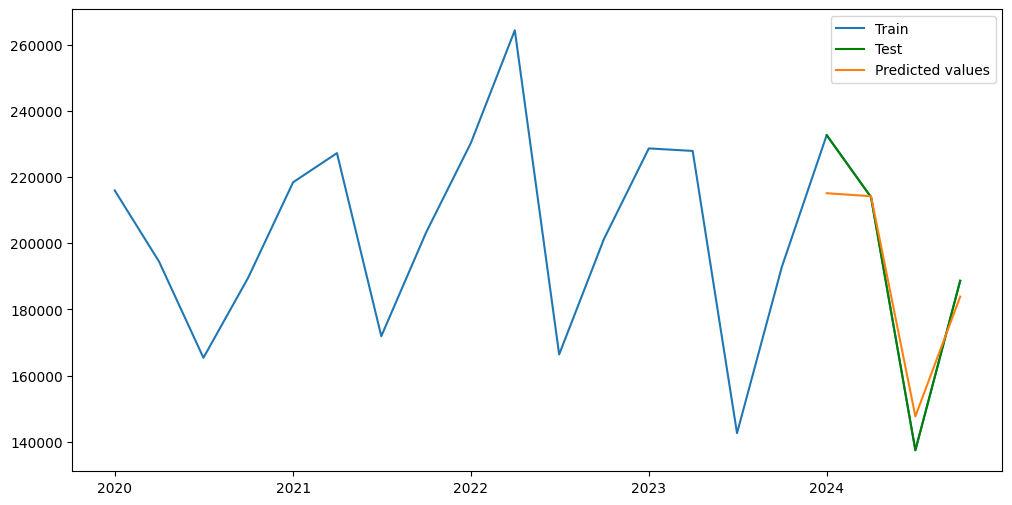

In [468]:
plt.figure(figsize=(12,6))
plt.plot(df_sarima.index, df_sarima['Liczba'], label='Train')
plt.plot(test.index, y_test, label='Test', color='green')
plt.plot(test.index, y_pred, label='Predicted values')
plt.legend()
plt.show()

In [469]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R²:",r_squared)

Mean absolute error 8221.656169099733
Mean squared error: 109105714.59800239
R²: 0.9147997482758613


In [470]:
coef = pd.Series(model_fit_sarima.params[1:], index=X_train.columns)
coef = coef.sort_values(ascending=True)

coef  

saldo migracji zagranicznych   -15.661815
Ludność                         -0.273331
Rozwody                          3.205003
Wskaźnik_%                            NaN
dtype: float64

#### For SARIMAX with stopa bezrobocia:

- Mean absolute error 14681.794798772782
- Mean squared error: 248582639.76897293
- R²: 0.8058827297854922
---
- Stopa bezrobocia_%             -33083.163498
- saldo migracji zagranicznych       -5.093649
- Ludność                            -0.465283
- Rozwody                             3.559919
- Wskaźnik_%                               NaN